# Import Libraries

In [368]:
import random
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import copy
import logging
import missingno
import operator
from collections import Counter
from category_encoders import TargetEncoder, BinaryEncoder
from imblearn.over_sampling import (
    SMOTE,
    RandomOverSampler,
    SVMSMOTE,
    BorderlineSMOTE,
    ADASYN,
    SMOTEN,
    SMOTENC
)
from imblearn.under_sampling import (
    TomekLinks, 
    RandomUnderSampler,
    EditedNearestNeighbours, 
    RepeatedEditedNearestNeighbours, 
    AllKNN, 
    CondensedNearestNeighbour, 
    ClusterCentroids, 
    NearMiss
)
from sklearn.model_selection import (
    LeaveOneOut,
    LeavePOut,
    RepeatedKFold,
    StratifiedKFold,
    TimeSeriesSplit,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    learning_curve,
    KFold
)
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelBinarizer, 
    MultiLabelBinarizer,
    MaxAbsScaler,
    QuantileTransformer,
    PowerTransformer,
    Normalizer
)
from sklearn.feature_extraction import (
    DictVectorizer, 
    FeatureHasher
)
from sklearn.linear_model import (
    LogisticRegression,
    Ridge,
    Lasso,
    ElasticNet,
    BayesianRidge
)
from sklearn.feature_selection import (
    SelectKBest, 
    SelectFpr, 
    SelectFdr, 
    SelectFwe, 
    SelectPercentile, 
    GenericUnivariateSelect, 
    VarianceThreshold, 
    RFE, 
    RFECV, 
    SequentialFeatureSelector, 
    SelectFromModel, 
    f_regression, 
    chi2, 
    f_classif, 
    mutual_info_classif, 
    mutual_info_regression
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import (
    KNeighborsClassifier,
    NearestNeighbors
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    matthews_corrcoef,
    balanced_accuracy_score
)
from tpot import TPOTClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.decomposition import (
    PCA, 
    FactorAnalysis, 
    TruncatedSVD, 
    FastICA, 
    KernelPCA
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from tensorflow.keras.layers import Input, Dense  # type: ignore
from tensorflow.keras.models import Model  # type: ignore
from scipy.stats import uniform, randint
from fast_ml.model_development import train_valid_test_split
from typing import (
    Any,
    Literal,
    Union,
    List,
    Optional,
    Dict,
    Tuple
)
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
logging.basicConfig(level=logging.INFO)

# Call_def

In [369]:
from ML_def import (
    read_data,
    columns_info,
    not_useful_columns,
    convert_to_numeric,
    target_last_col,
    
    remove_missing_rows,
    fill_missing_values_dataFrame,
    fill_missing_values_column,
    
    check_outliers_IQR,
    check_outliers_zscore,
    plot_outliers_boxplot,
    box_plot_all_columns,
    plot_outliers_scatterplot_IQR,
    plot_outliers_scatterplot_zscore,
    handle_outliers_IQR,
    handle_outliers_zscore,
    
    calculate_skewness,
    handle_skewness,
    
    get_columns_with_2_unique_values,
    analyze_null_columns,
    
    check_balance_classification,
    over_under_sampling_classification,
    
    rate_by_group,
    plot_groupby,
    plot_pivot,
    plot_pivot_2,
    plot_groupby_and_pivot,
    
    calculate_correlation,
    Heatmap_Correlation,
    
    create_custom_scatter_plot,
    plot_histograms,
    
    feature_selection,
    
    encode_column,
    
    get_x_y,
    get_x_y_TVT,
    get_x_y_TVT_shape,
    validate_test_data_categorical_columns,
    
    scale_data,
    
    dimensionality_reduction,
    
    get_cross_validator,
    grid_search_classifier,
    random_search_classifier,
    get_classifier,
    plot_feature_importance,
    Check_Overfitting_Classification,
    plot_confusion_matrix,
    evaluate_model_Classification,
    plots_evaluate_models,
)

# call_visualization_def

In [370]:
from ML_visualization import (
    plot_line,
    plot_line_matplotlib,
    plot_line_all_column,
    plot_line_seaborn,
    plot_line_plotly,
    scatter_plot_matplotlib,
    scatter_plot_seaborn,
    scatter_plot_plotly,
    reg_plot,
    resid_plot,
    bar_plot_matplotlib,
    bar_plot_seaborn,
    bar_plot_all_column,
    bar_plot_plotly,
    multiple_bar_plot_matplotlib,
    multiple_bar_plots_seaborn,
    multiple_bar_plots_plotly,
    cat_plot,
    cat_plot_all_column,
    facet_grid_seaborn,
    pie_chart,
    pie_chart_plotly,
    plot_single_histogram_matplotlib,
    plot_histograms_matplotlib,
    plot_single_histogram_seaborn,
    plot_histograms_seaborn,
    plot_histograms_plotly,
    kde_plot,
    kde_plot_all_column,
    count_plot,
    count_plot_all_column,
    count_plot_plotly,
    box_plot_matplotlib,
    box_plot_seaborn,
    box_plot_plotly,
    box_plot_all_column,
    heatmap_plot,
    heatmap_plot_plotly,
    pair_plot,
    pair_plot_plotly,
    violin_plot,
    violin_plot_plotly,
    plot_violin_all_column,
    joint_plot,
    plot_parallel_coordinates,
    plot_contour,
    plot_tricontourf,
    custom_plot
)

# Read_Data

In [371]:
df = read_data(r'Churn_Modelling.csv')
true_original_df = copy.deepcopy(df)
print(df.shape)
df.head()

the DataFrame dont have any duplicates row
Data read successfully from Churn_Modelling.csv
(10000, 14)


RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [372]:
target_column = 'Exited'

In [373]:
# Make the target is last column
df = target_last_col(df,target_column)

# Get Information of Data

In [374]:
df_columns = df.columns.to_list()
print(df_columns)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [375]:
columns_info(df)

names   dtypes  \
0         RowNumber    int64   
1        CustomerId    int64   
2           Surname   object   
3       CreditScore    int64   
4         Geography   object   
5            Gender   object   
6               Age    int64   
7            Tenure    int64   
8           Balance  float64   
9     NumOfProducts    int64   
10        HasCrCard    int64   
11   IsActiveMember    int64   
12  EstimatedSalary  float64   
13           Exited    int64   

                                               unique  n_unique  \
0   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...     10000   
1   [15634602, 15647311, 15619304, 15701354, 15737...     10000   
2   [Hargrave, Hill, Onio, Boni, Mitchell, Chu, Ba...      2932   
3   [619, 608, 502, 699, 850, 645, 822, 376, 501, ...       460   
4                            [France, Spain, Germany]         3   
5                                      [Female, Male]         2   
6   [42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...        70   
7                  [2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]        11   
8   [0.0, 83807.86, 159660.8, 125510.82, 113755.78...      6382   
9                                        [1, 3, 2, 4]         4   
10                                             [1, 0]         2   
11                                             [1, 0]         2   
12  [101348.88, 112542.58, 113931.57, 93826.63, 79...      9999   
13                                             [1, 0]         2   

    number_of_rows  number_of_null  
0            10000               0  
1            10000               0  
2            10000               0  
3            10000               0  
4            10000               0  
5            10000               0  
6            10000               0  
7            10000               0  
8            10000               0  
9            10000               0  
10           10000               0  
11           10000               0  
12           10000               0  
13           10000               0

# drop not useful columns

#### list of columns

In [376]:
not_useful_columns_name = ['RowNumber','CustomerId','Surname']
not_useful_columns(df=df, column_name=not_useful_columns_name)

#### single column

In [377]:
# not_useful_columns(df=df, column_name='')

# change the dtype of the column from object to numeric

#### list of columns

In [378]:
# convert_to_numeric_columns_name = ['']
# convert_to_numeric(df=df, column_name=convert_to_numeric_columns_name)

#### single column

In [379]:
# convert_to_numeric(df=df, column_name='Total Charges')

# take copy for Visualization

In [380]:
original_df = copy.deepcopy(df)
original_df.head(3)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1

# Describe numerical column and his information

In [381]:
numerical_column = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_column)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [382]:
df.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

# Describe object column and his information

In [383]:
object_column =df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(object_column)

['Geography', 'Gender']


In [384]:
df.describe(include=['object'])

Geography Gender
count      10000  10000
unique         3      2
top       France   Male
freq        5014   5457

# Data Encoding columns with 2 unique values

In [385]:
get_columns_with_2_unique_values(df)

The list: ['Gender'] unique values: ('Female', 'Male')


In [386]:
columns = ['Gender']
df = encode_column(df, columns = columns, method='binary', binary_1='Male', binary_0='Female')

In [387]:
# # if the target column not binary
# columns = [target_column]
# true_original_df = encode_column(true_original_df, columns = columns, method='binary', binary_1='Yes', binary_0='No')

In [388]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France       1   42       2       0.00              1   
1          608     Spain       1   41       1   83807.86              1   
2          502    France       1   42       8  159660.80              3   
3          699    France       1   39       1       0.00              2   
4          850     Spain       1   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

# check columns have nulls

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


In [390]:
null_columns = analyze_null_columns(df)
null_columns

The columns dtype is object: []
The columns dtype is numerical: []


Empty DataFrame
Columns: [Column, Null Count, Type]
Index: []

In [391]:
# df.isnull().sum()

## Identify columns with missing values

In [392]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# Removing Rows with Missing Values

#### list of columns

In [393]:
# remove_rows_column_name = ['Total Charges', '', '']
# remove_missing_rows(df=df, column_name=remove_rows_column_name)

#### single column

In [394]:
# remove_missing_rows(df=df, column_name='Total Charges')

#### from all DataFrame

In [395]:
# remove_missing_rows(df=df)

## check columns with missing values

In [396]:
# # Identify columns with missing values
# missing_columns = df.columns[df.isnull().any()].tolist()
# print("Columns with missing values: \n" , missing_columns)

# Filling Missing Values

### Filling Missing Values for all DataFrame

In [397]:
# df = fill_missing_values_dataFrame(df, model='KNNImputer', n_neighbors=3)

### Filling Missing Values for column

#### list of columns

In [398]:
# fill_missing_columns = ['Total Charges', '', '']
# df = fill_missing_values_column(df, columns=fill_missing_columns, model='KNNImputer', n_neighbors=3)

#### single column

In [399]:
# df = fill_missing_values_column(df, columns='', model='KNNImputer', n_neighbors=3)

### check columns with missing values

In [400]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# check outliers

## check outliers and skew with box plot

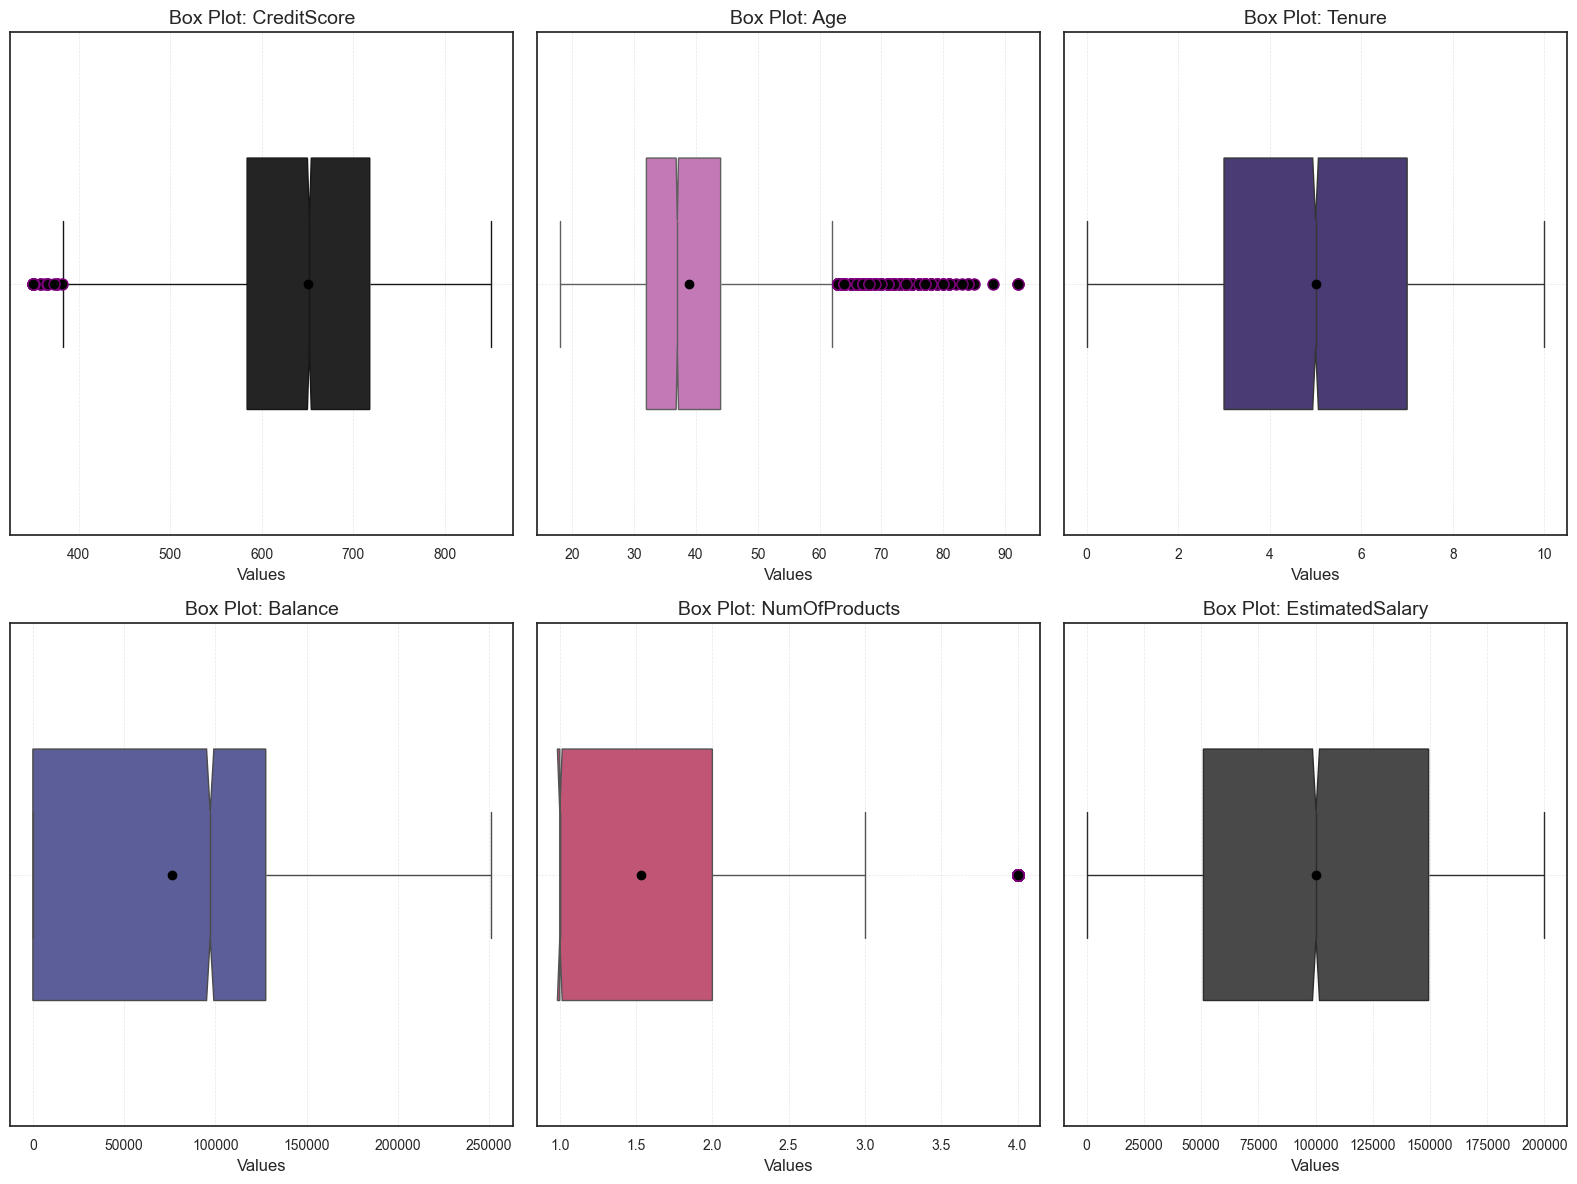

In [401]:
box_plot_all_columns(df, subplot_row = 3, figsize=(16, 12))

## check outliers IQR

### Numbers

In [402]:
outliers_df, outlier_counts = check_outliers_IQR(df)

Number of outliers in each column (IQR method):
CreditScore: 15
Age: 359
Tenure: 0
Balance: 0
NumOfProducts: 60
EstimatedSalary: 0

Columns with outliers: ['CreditScore', 'Age', 'NumOfProducts']


### Scatter Plot

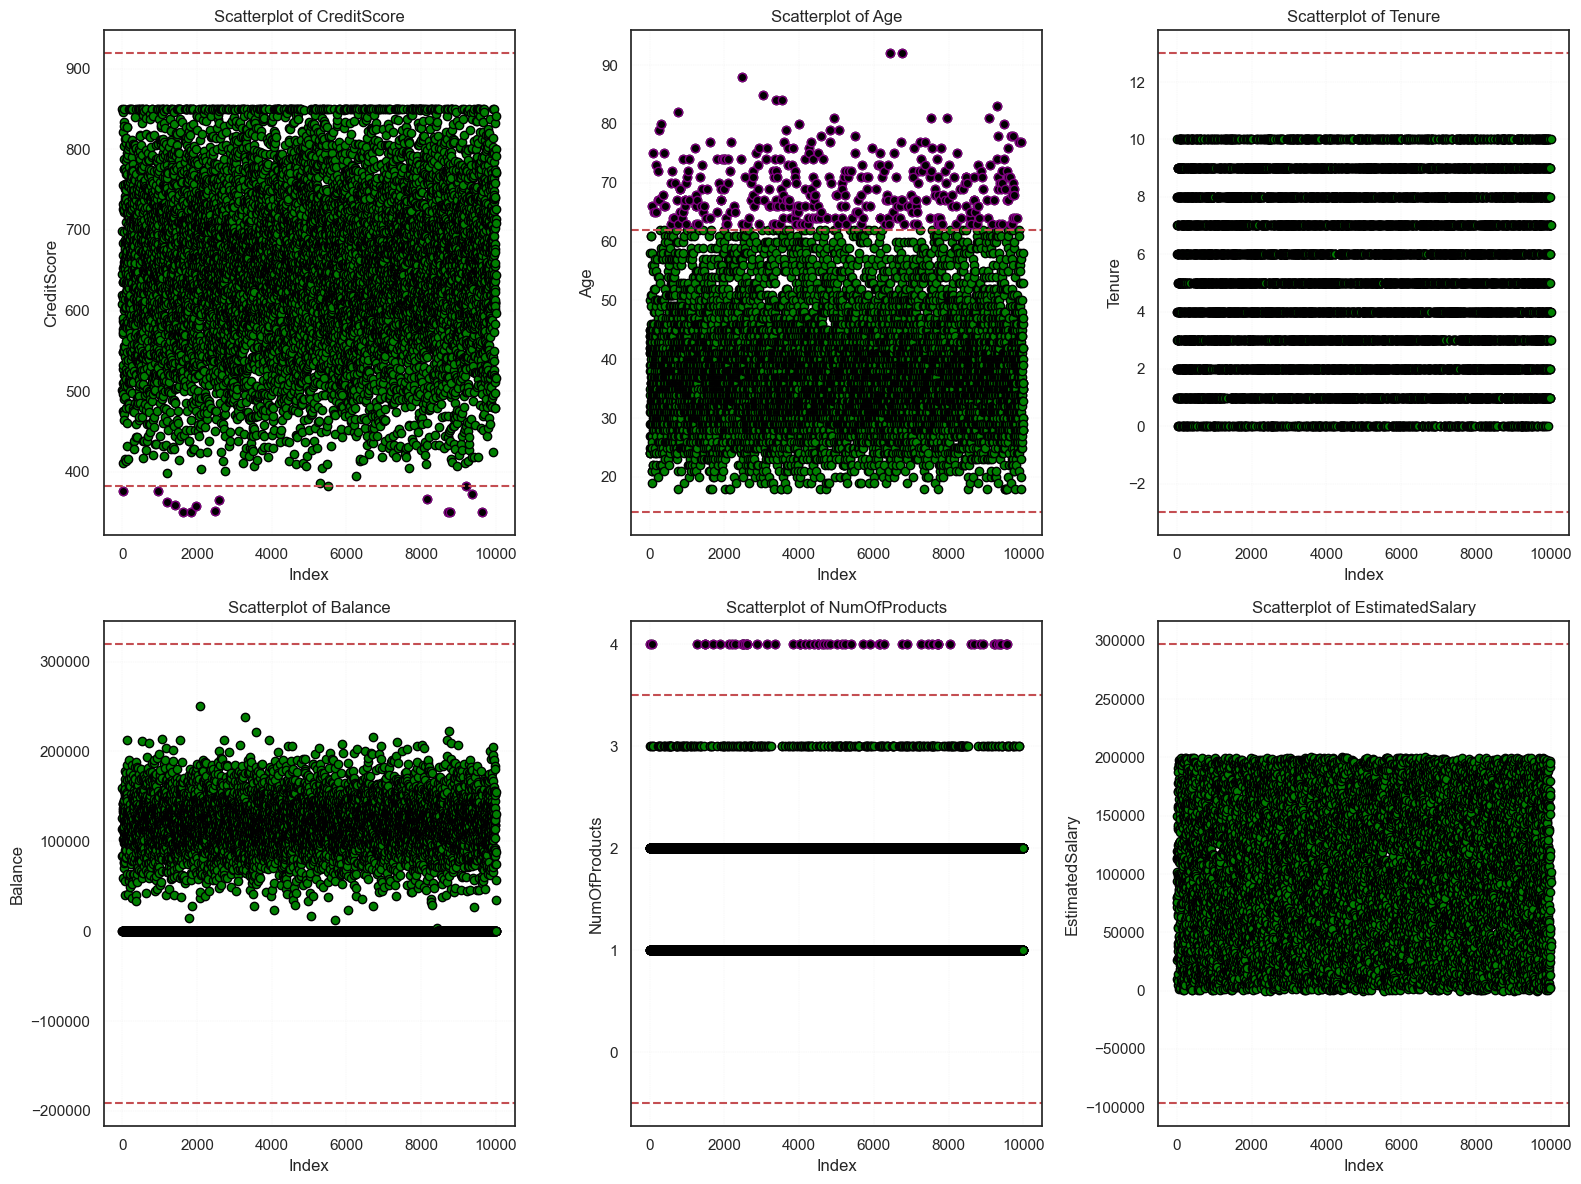

In [403]:
plot_outliers_scatterplot_IQR(original_df, outlier_counts)

## Handle Outliers IQR

In [404]:
outliers_column = ['CreditScore', 'Age', 'NumOfProducts']

df = handle_outliers_IQR(df, outliers_column, method='cap')

# df = handle_outliers_IQR(df, outliers_column, method='remove')
# df = handle_outliers_IQR(df, outliers_column, method='impute', imputation_method='mean')
# df = handle_outliers_IQR(df, outliers_column, method='transform', transformation_method='boxcox')

In [405]:
outliers_df, outlier_counts = check_outliers_IQR(df)

Number of outliers in each column (IQR method):
CreditScore: 0
Age: 0
Tenure: 0
Balance: 0
NumOfProducts: 0
EstimatedSalary: 0

Columns with outliers: []


## check outliers Z-Score

### Numbers

In [406]:
numeric_df, z_scores, outlier_counts_zscore = check_outliers_zscore(df)

Number of outliers in each column (Z-score method):
CreditScore: 0
Age: 0
Tenure: 0
Balance: 0
NumOfProducts: 60
EstimatedSalary: 0

Columns with outliers: ['NumOfProducts']


### Scatter Plot

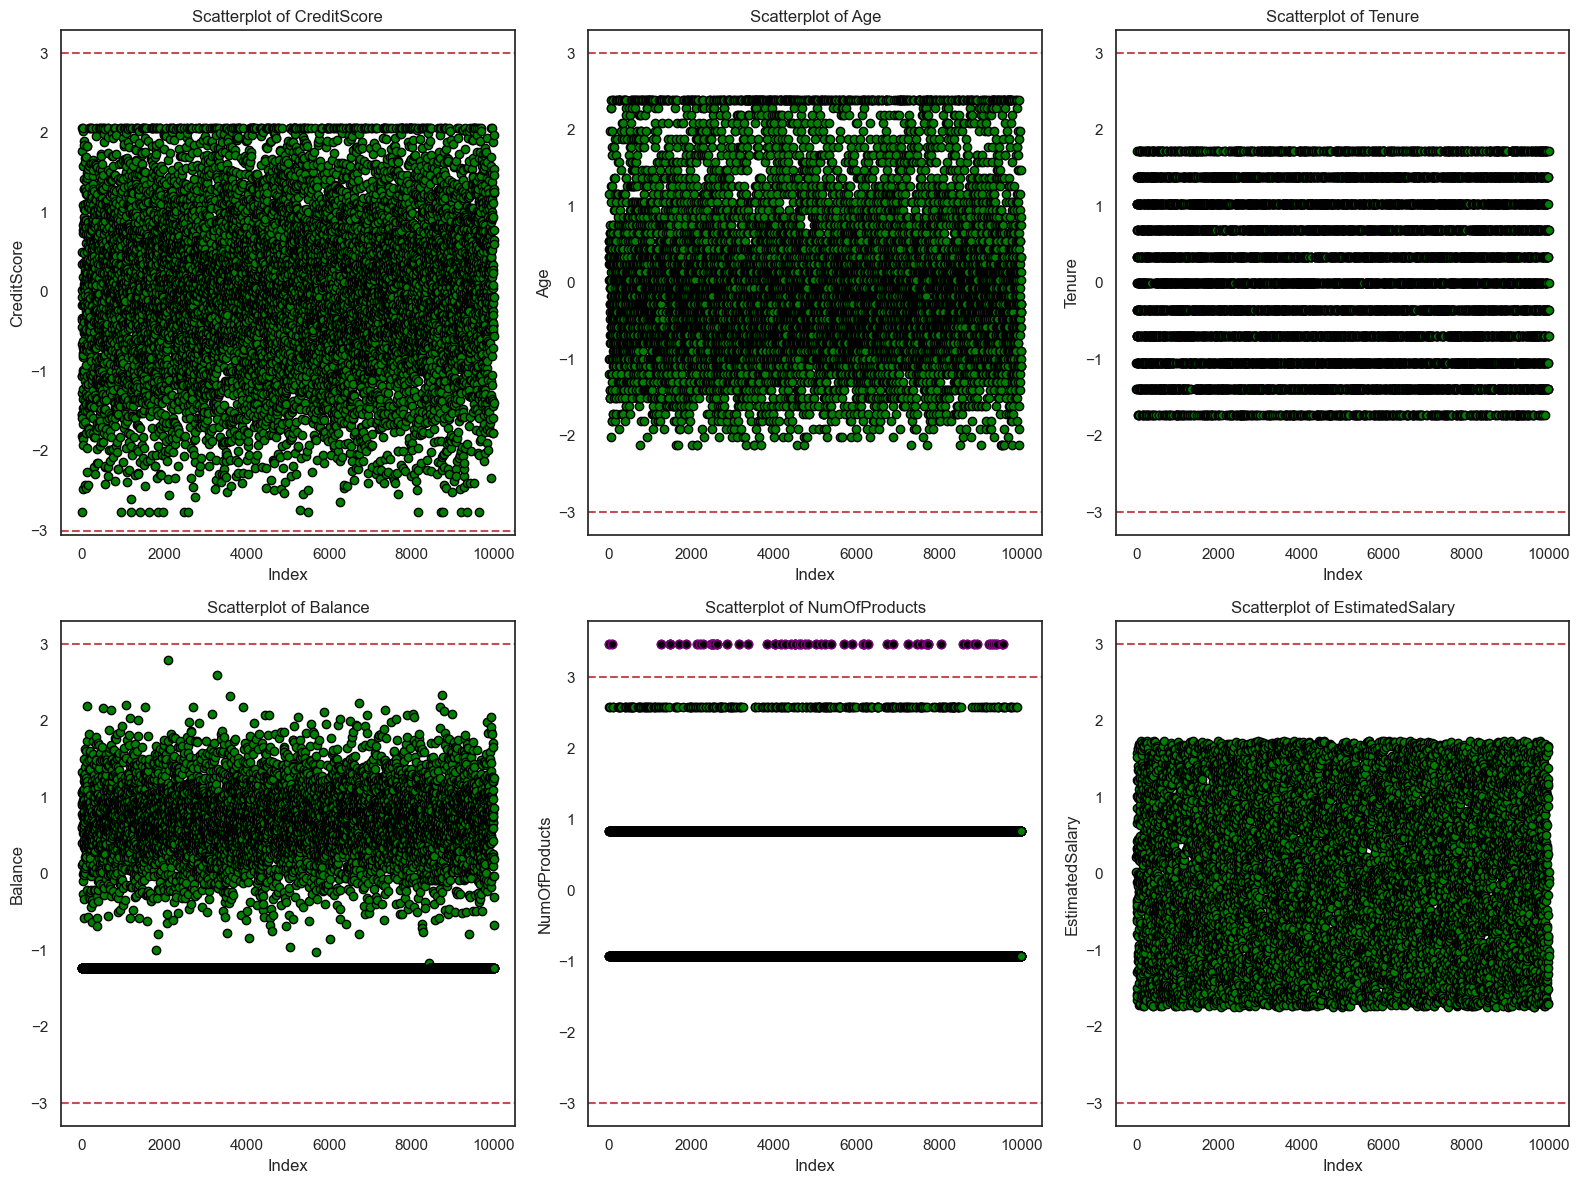

In [407]:
plot_outliers_scatterplot_zscore(z_scores, outlier_counts_zscore)

## Handle Outliers Z-Score

In [408]:
outliers_column = []

# df = handle_outliers_zscore(df, outliers_column, method='cap')

# df = handle_outliers_zscore(df, outliers_column, method='remove')
# df = handle_outliers_zscore(df, outliers_column, method='impute', imputation_method='mean')
# df = handle_outliers_zscore(df, outliers_column, method='transform', transformation_method='boxcox')

In [409]:
numeric_df, z_scores, outlier_counts_zscore = check_outliers_zscore(df)

Number of outliers in each column (Z-score method):
CreditScore: 0
Age: 0
Tenure: 0
Balance: 0
NumOfProducts: 60
EstimatedSalary: 0

Columns with outliers: ['NumOfProducts']


# skew

In [410]:
columns_right_skewed, columns_left_skewed = calculate_skewness(df)

Age is right skewed with skewness 0.630314700010664
NumOfProducts is right skewed with skewness 0.5672445027274912
columns right skewed: ['Age', 'NumOfProducts']


Balance is left skewed with skewness -0.14110871094154384
columns left skewed: ['Balance']


columns right and left skewed: ['Age', 'NumOfProducts', 'Balance']


CreditScore is normal skewed with skewness -0.06425547313963796
Tenure is normal skewed with skewness 0.01099145797717904
EstimatedSalary is normal skewed with skewness 0.0020853576615585162
normal skewed columns: ['CreditScore', 'Tenure', 'EstimatedSalary']


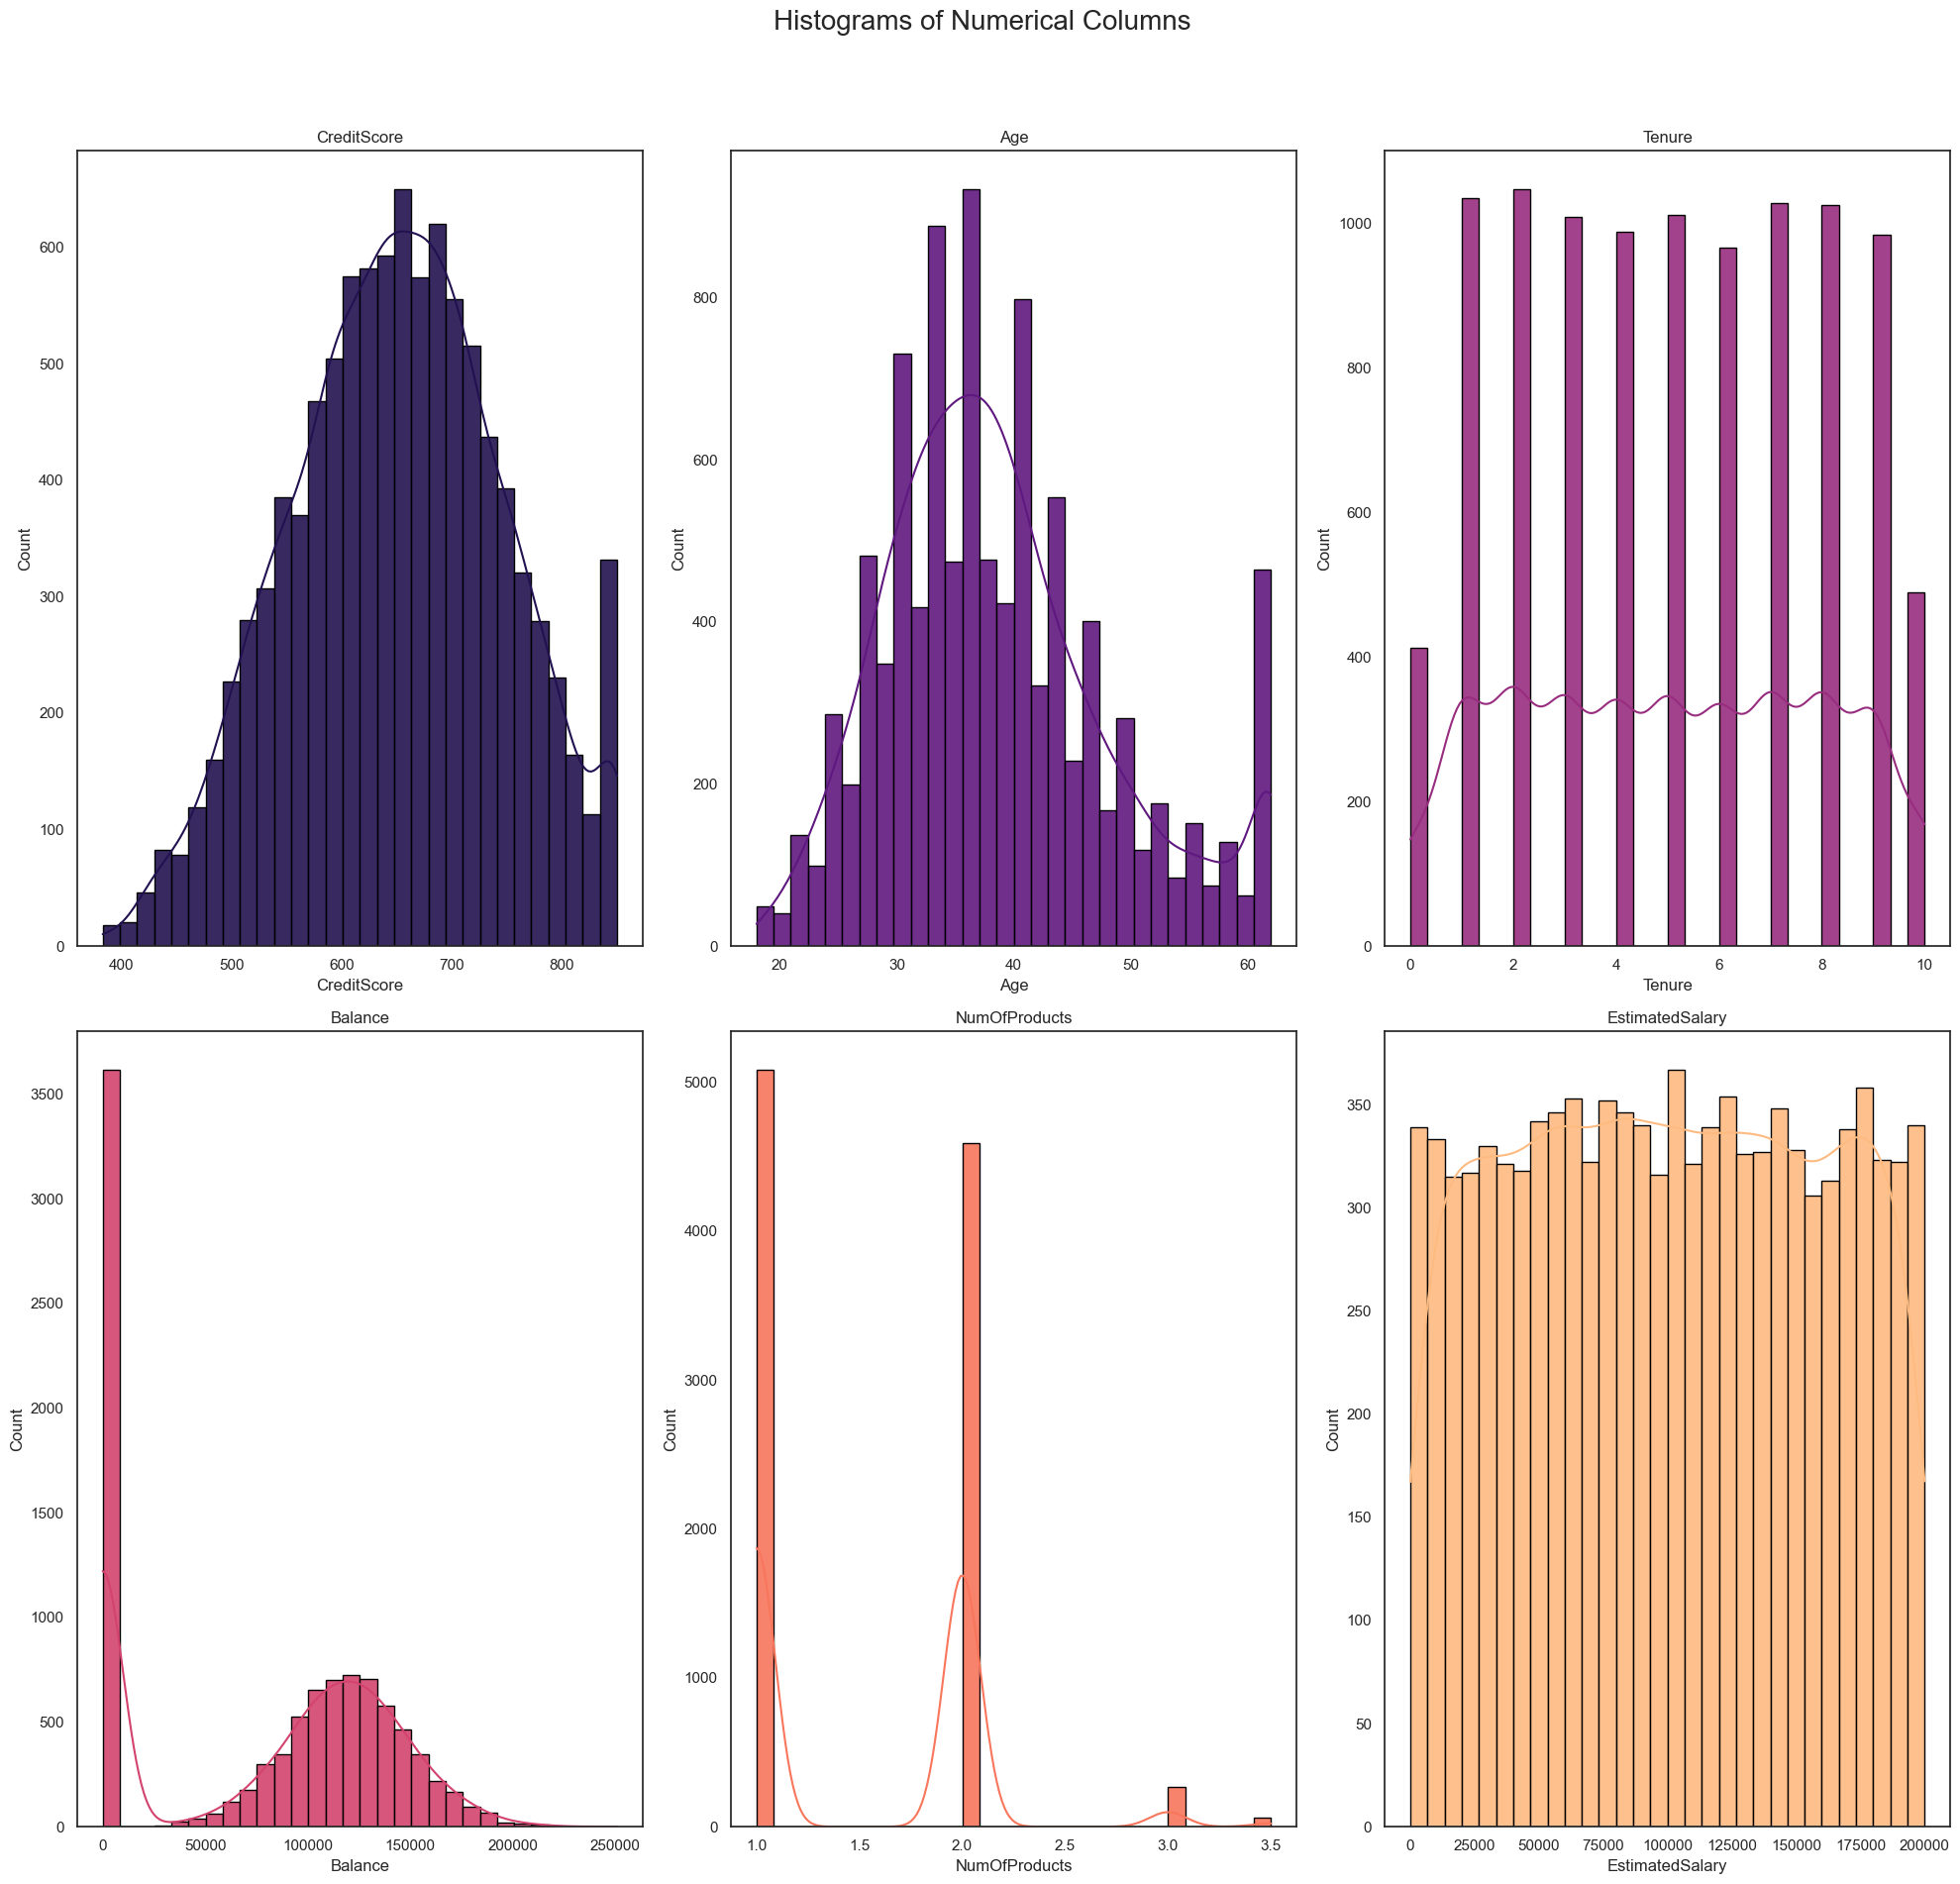

In [411]:
plot_histograms(df,column=None, bins=30, single_histogram_figsize = (20, 20), all_histograms_figsize = (20, 20))

In [412]:
skewness_columns = ['Age', 'NumOfProducts']
skewness_columns_second = []

# df = handle_skewness(df, skewness_columns, method='boxcox')
# df = handle_skewness(df, skewness_columns_second, method='robust_scale')
# df = handle_skewness(df, skewness_columns, method='yeo_johnson')


In [413]:
# columns_right_skewed, columns_left_skewed = calculate_skewness(df)

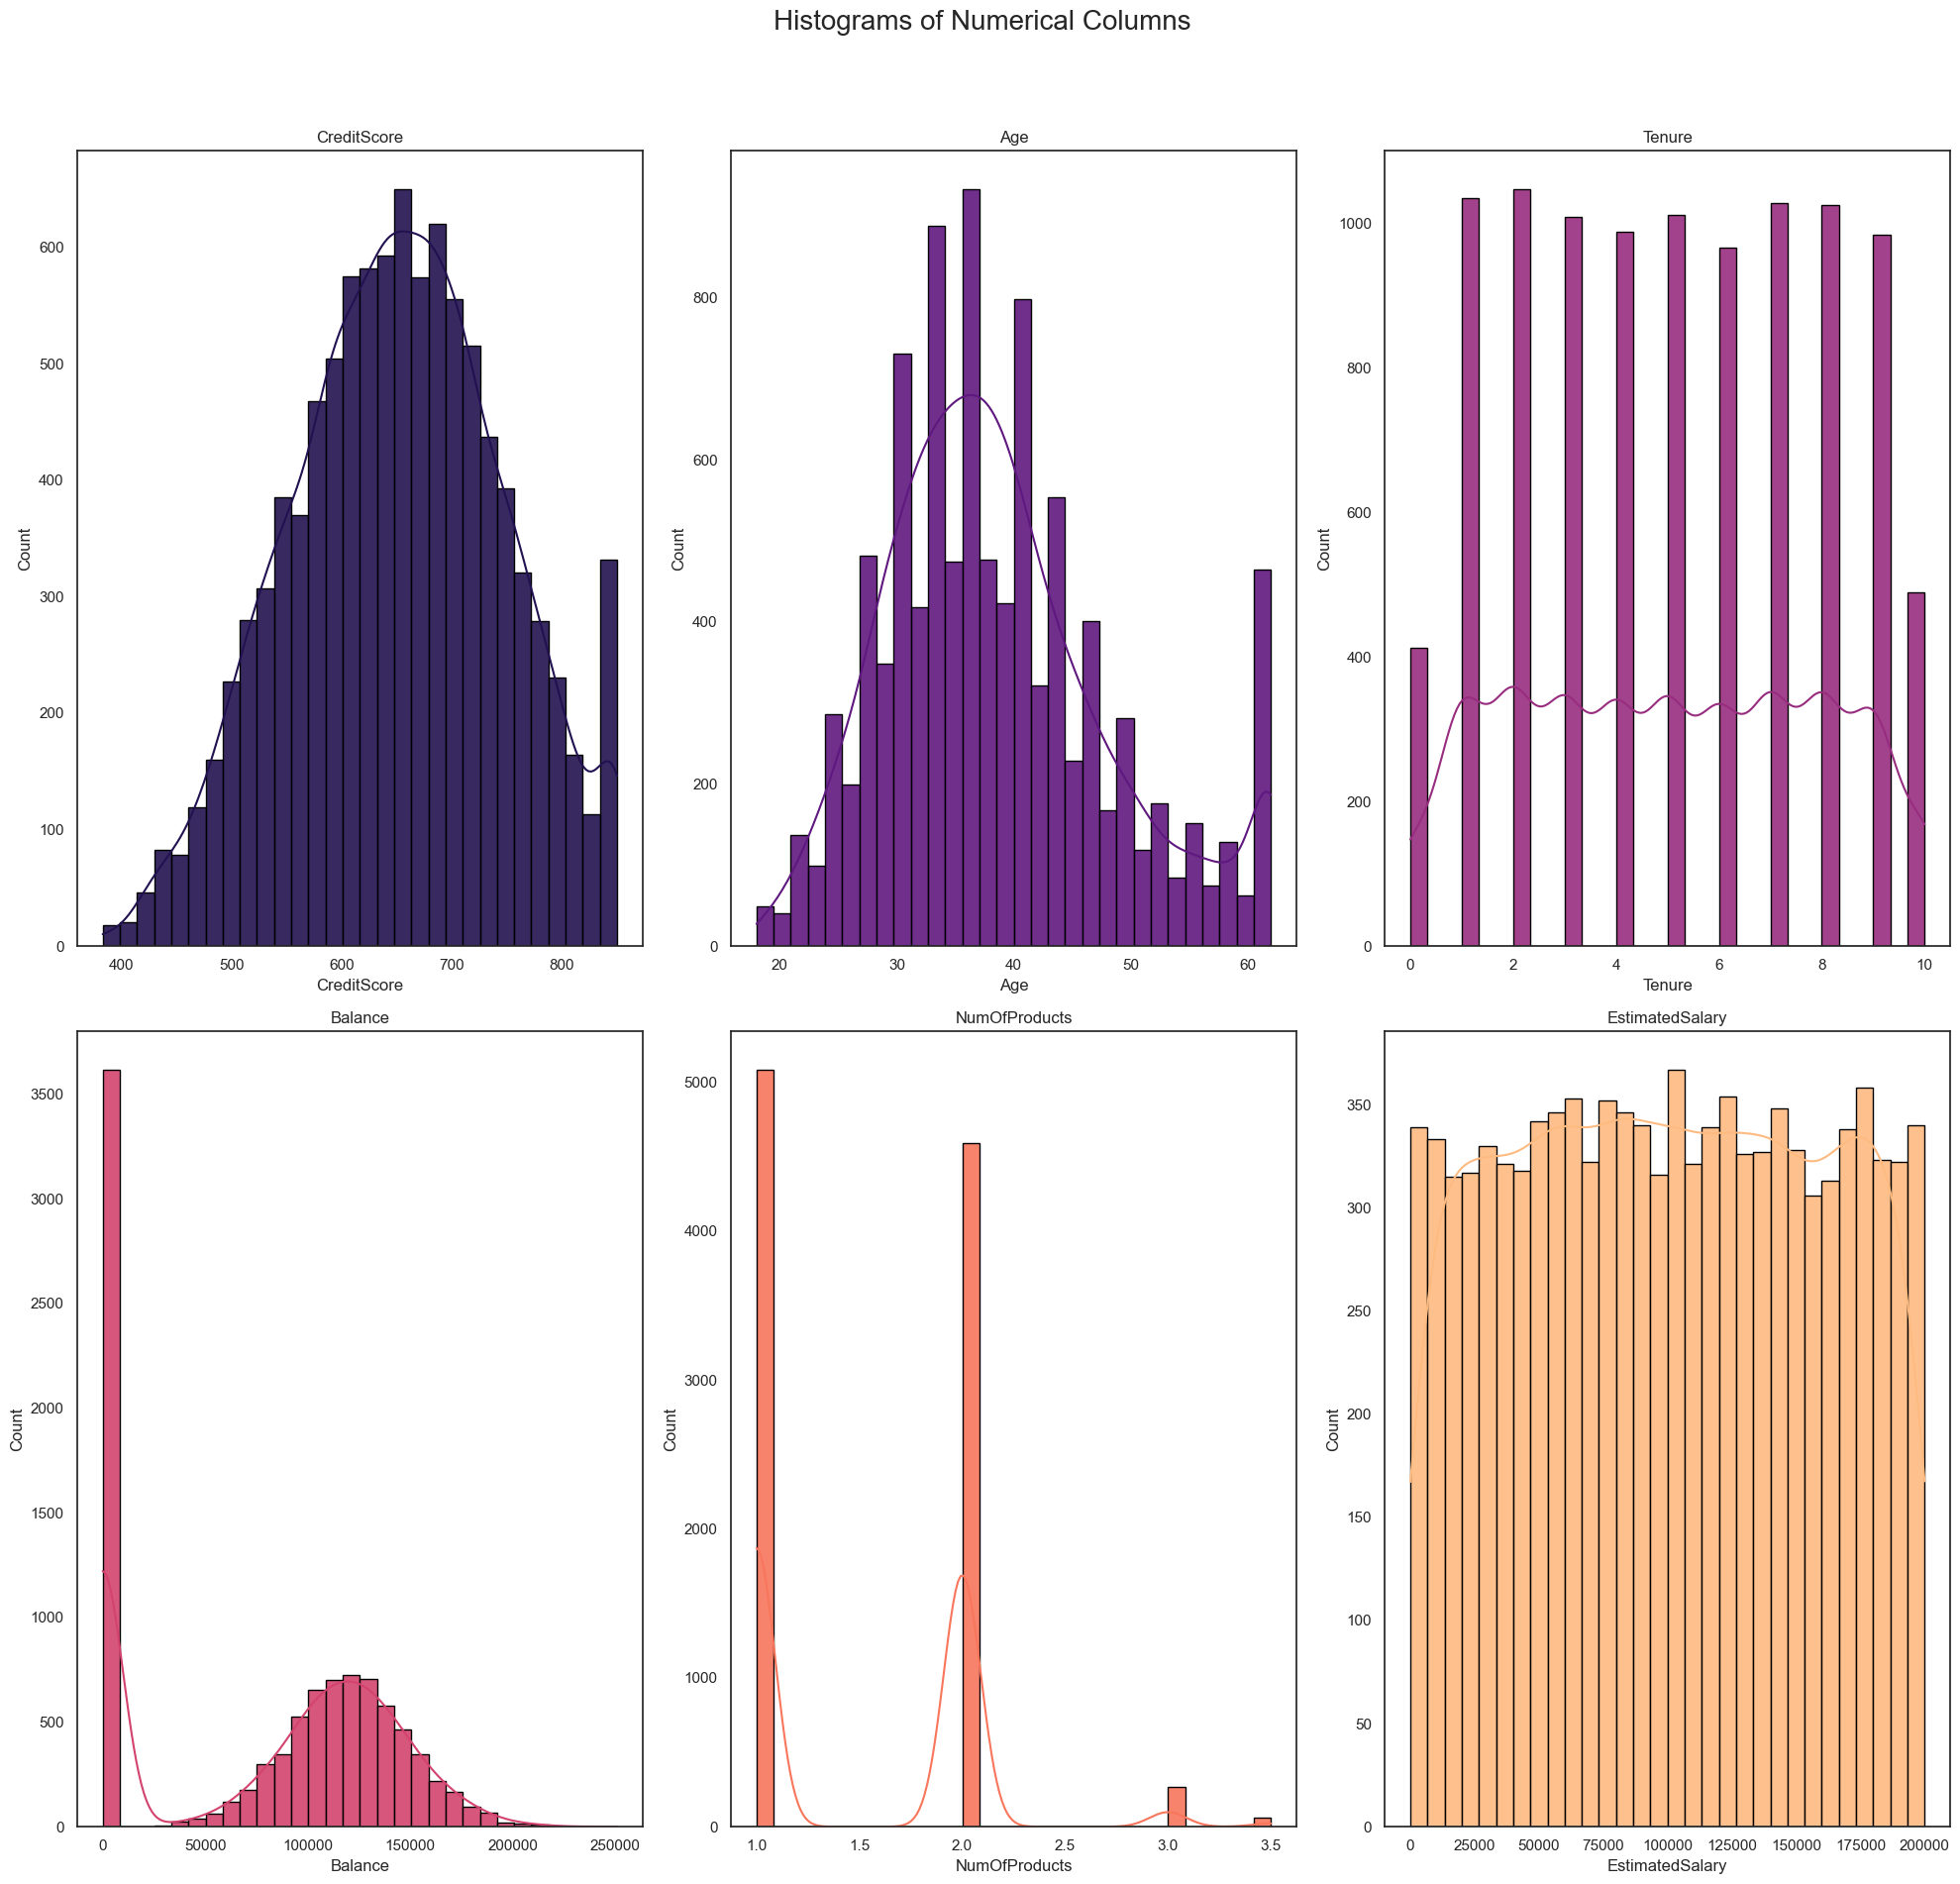

In [414]:
plot_histograms(df,column=None, bins=30, single_histogram_figsize = (20, 20), all_histograms_figsize = (20, 20))

## check outliers and skew with box plot

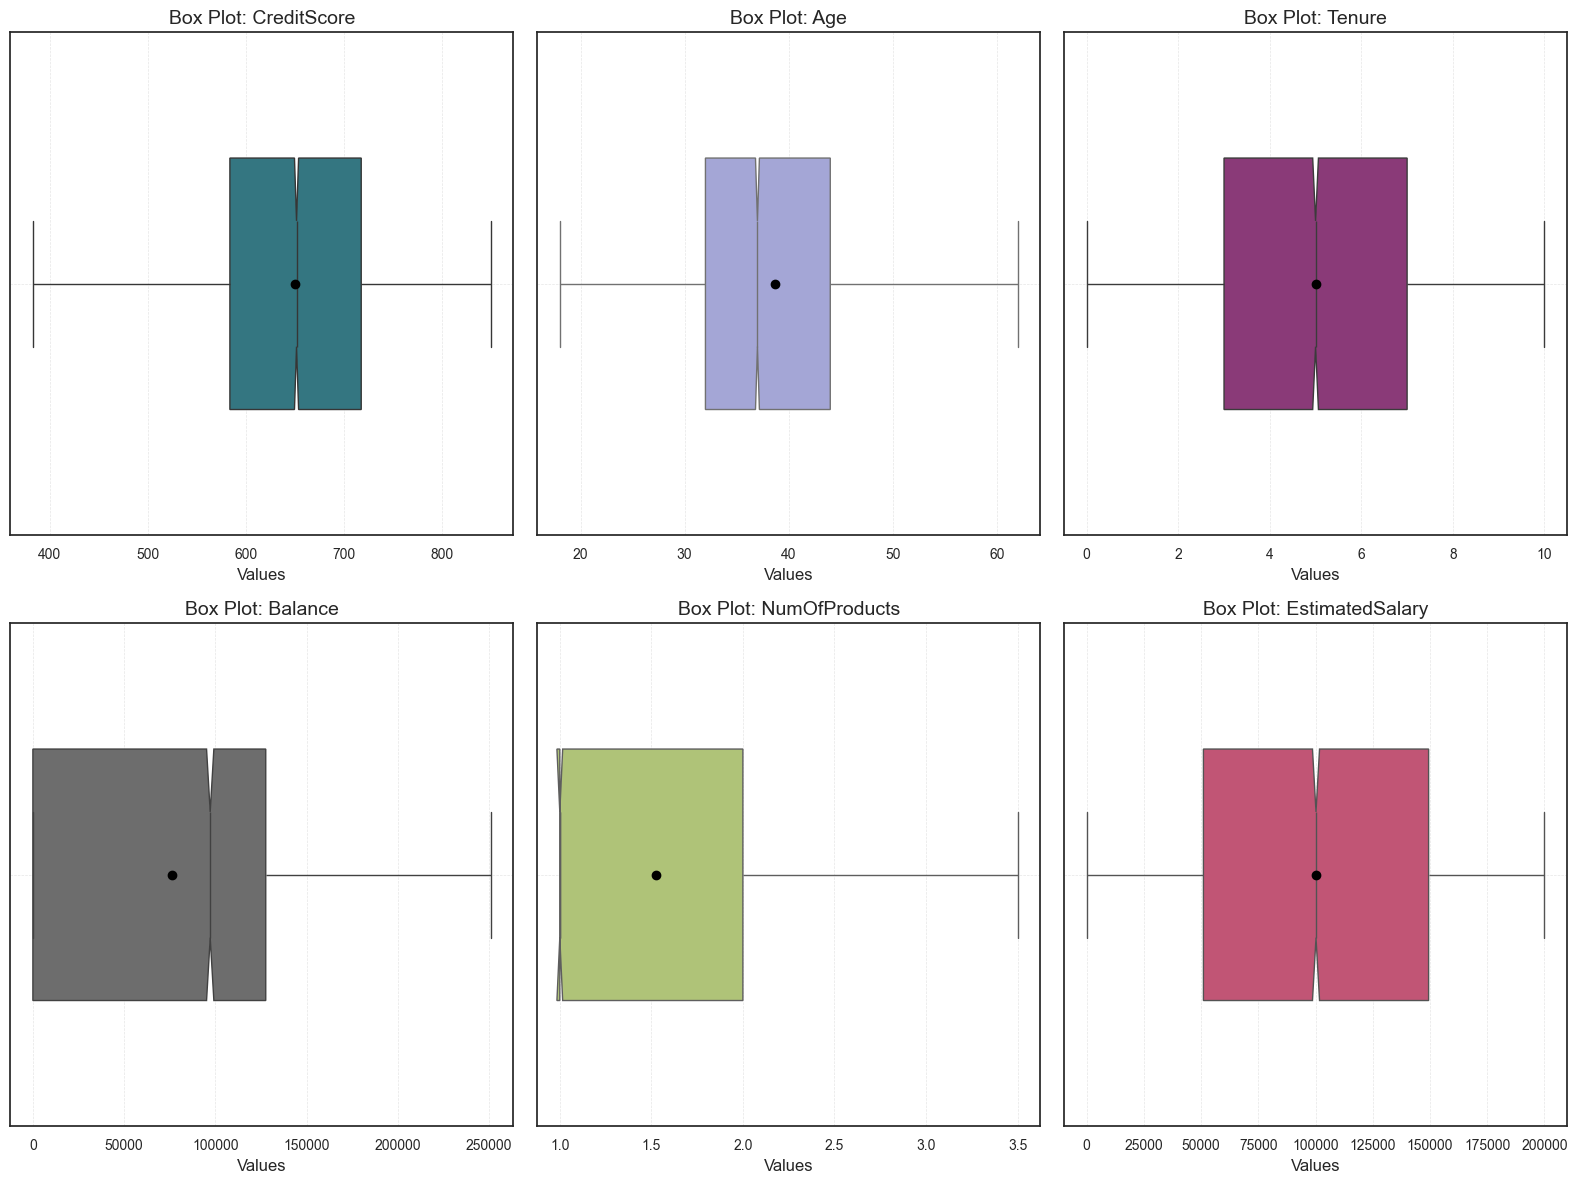

In [415]:
box_plot_all_columns(df, subplot_row = 3, figsize=(16, 12))

# Check the unbalance data

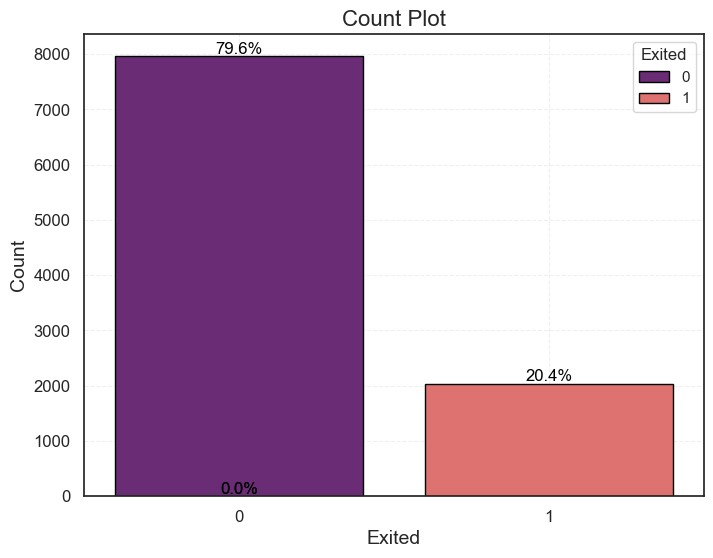

count
name       
0      7963
1      2037

In [416]:
check_balance_classification(df,column_plot=target_column)

# Visualization

## info from the data

In [417]:
age_Exited_rates = rate_by_group(true_original_df, 'Age', 'Exited', 'CustomerId', positive_class=1, threshold=4)

The classification rate of 54-71 in Age_range: 45.23%

The classification rate of 36-53 in Age_range: 26.57%

The classification rate of 18-35 in Age_range: 8.36%

The classification rate of 72-89 in Age_range: 3.85%

The classification rate of 90-92 in Age_range: 0.00%



In [418]:
NumOfProducts_Exited_rates = rate_by_group(true_original_df, 'NumOfProducts', 'Exited', 'CustomerId', positive_class=1)

The classification rate of 1 in NumOfProducts: 27.71%

The classification rate of 3 in NumOfProducts: 82.71%

The classification rate of 2 in NumOfProducts: 7.58%

The classification rate of 4 in NumOfProducts: 100.00%



In [419]:
Geography_Exited_rates = rate_by_group(true_original_df, 'Geography', 'Exited', 'CustomerId', positive_class=1)
Geography_Exited_rates

The classification rate of France in Geography: 16.15%

The classification rate of Spain in Geography: 16.67%

The classification rate of Germany in Geography: 32.44%



name    values
0  Germany  0.324432
1    Spain  0.166734
2   France  0.161548

In [420]:
Tenure_Exited_rates = rate_by_group(true_original_df, 'Tenure', 'Exited', 'CustomerId', positive_class=1, threshold=5)
Tenure_Exited_rates

The classification rate of 0-1 in Tenure_range: 22.58%

The classification rate of 4-5 in Tenure_range: 20.59%

The classification rate of 8-10 in Tenure_range: 20.45%

The classification rate of 2-3 in Tenure_range: 20.13%

The classification rate of 6-7 in Tenure_range: 18.70%



name    values
0   0-1  0.225829
1   4-5  0.205897
2  8-10  0.204482
3   2-3  0.201264
4   6-7  0.186967

## chart

In [421]:
PaymentMethod_name = df['Geography'].value_counts().index.to_list()
PaymentMethod_values = df['Geography'].value_counts().values.tolist()
# pie_chart(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Payment Methods")
pie_chart_plotly(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Geography")


In [422]:
InternetService_name = df['NumOfProducts'].value_counts().index.to_list()
InternetService_values = df['NumOfProducts'].value_counts().values.tolist()
# pie_chart(labels=InternetService_name, sizes=InternetService_values, title="Payment Methods")
pie_chart_plotly(labels=InternetService_name, sizes=InternetService_values, title="Num of Products")

In [423]:
Contract_name = original_df['IsActiveMember'].value_counts().index.to_list()
Contract_values = original_df['IsActiveMember'].value_counts().values.tolist()
# pie_chart(labels=Contract_name, sizes=Contract_values, title="Payment Methods")
pie_chart_plotly(labels=Contract_name, sizes=Contract_values, title="Is Active Member")

## Multiple bar

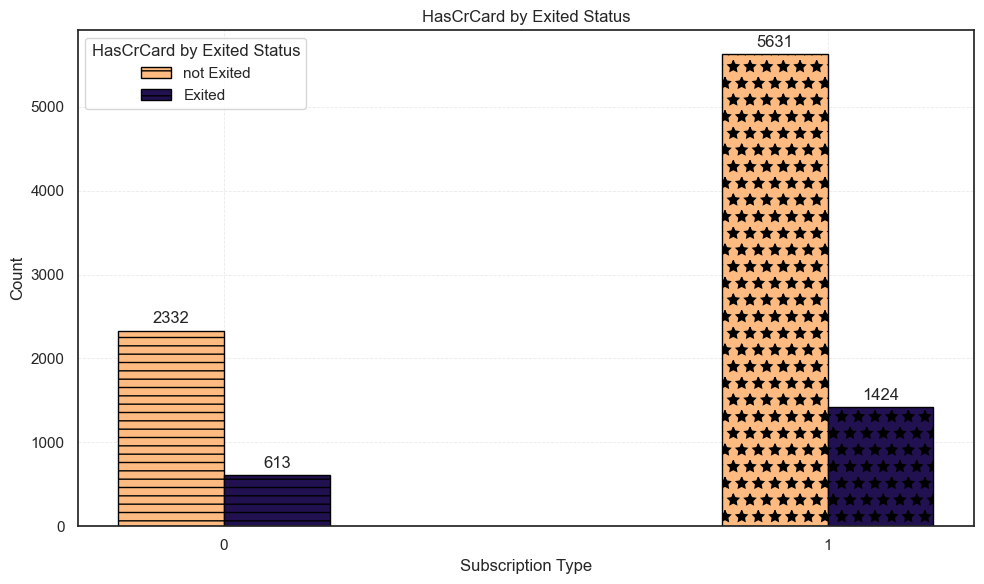

In [424]:
grouped_data = original_df.groupby(['HasCrCard', 'Exited']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['not Exited', 'Exited']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='HasCrCard by Exited Status', xlabel='Subscription Type', ylabel='Count')

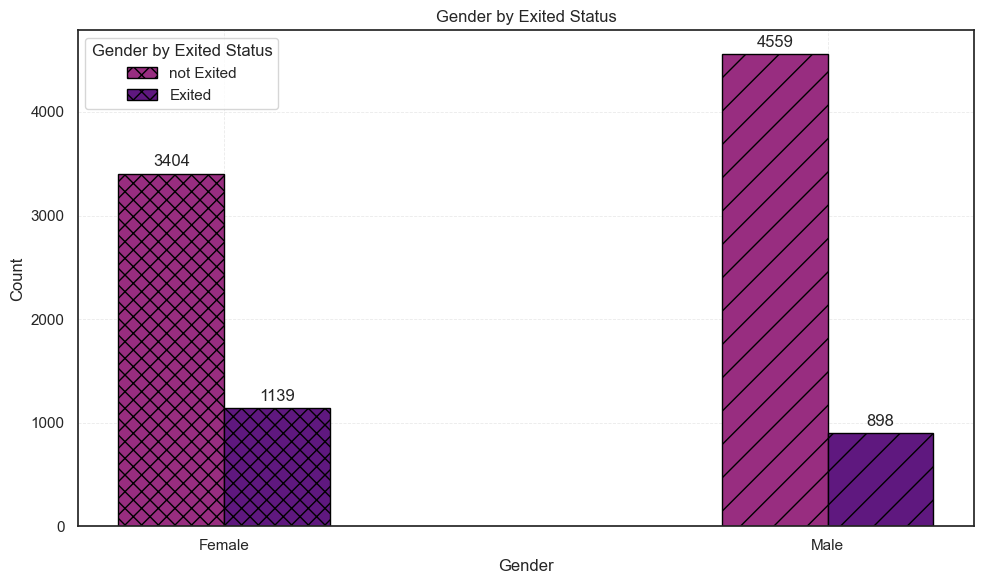

In [425]:
grouped_data = original_df.groupby(['Gender', 'Exited']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['not Exited', 'Exited']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Gender by Exited Status', xlabel='Gender', ylabel='Count')

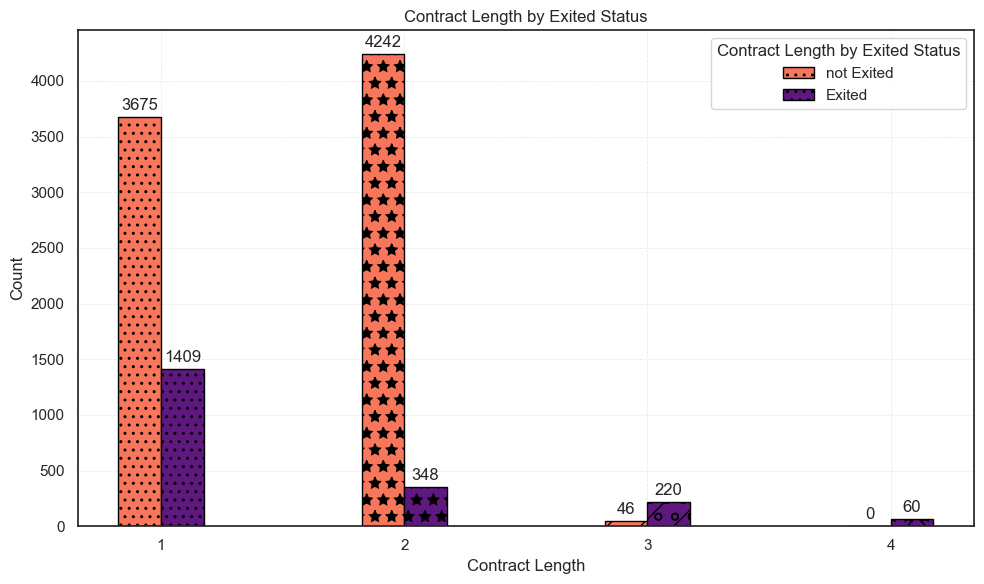

In [426]:
grouped_data = original_df.groupby(['NumOfProducts', 'Exited']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['not Exited', 'Exited']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Contract Length by Exited Status', xlabel='Contract Length', ylabel='Count')

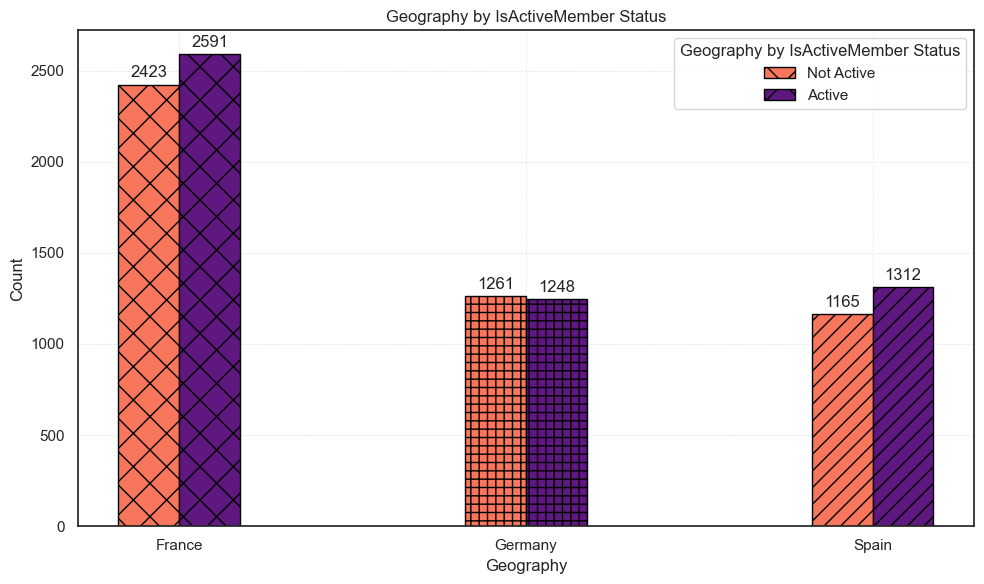

In [427]:
grouped_data = original_df.groupby(['Geography', 'IsActiveMember']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['Not Active','Active']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Geography by IsActiveMember Status', xlabel='Geography', ylabel='Count')

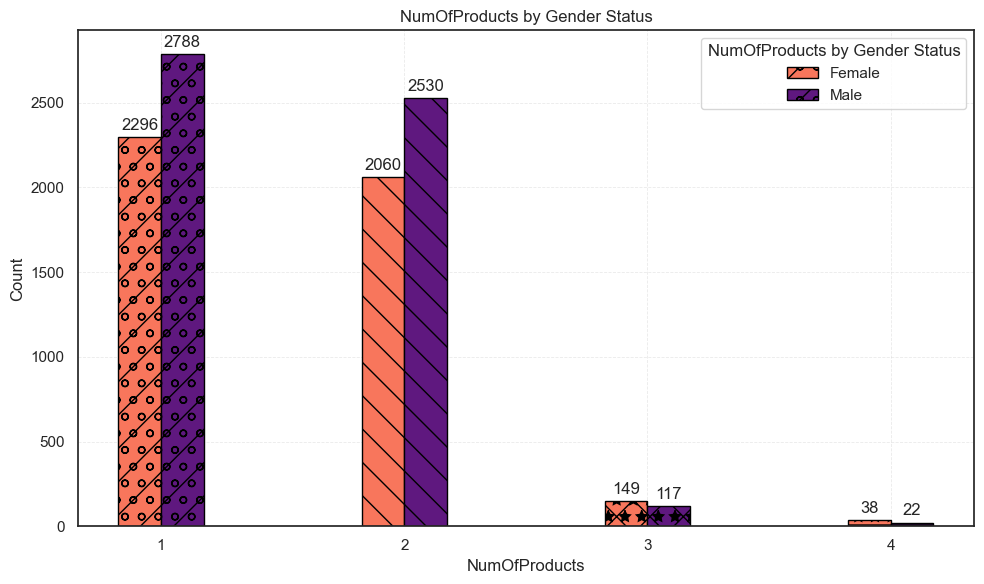

In [428]:
grouped_data = original_df.groupby(['NumOfProducts', 'Gender']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['Female', 'Male']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='NumOfProducts by Gender Status', xlabel='NumOfProducts', ylabel='Count')

## Bar

In [429]:
column_counts = original_df['Tenure'].value_counts().reset_index()
column_counts.columns = ['tenure', 'value']

bar_plot_plotly(df=column_counts, x='tenure', y='value', hue='value')

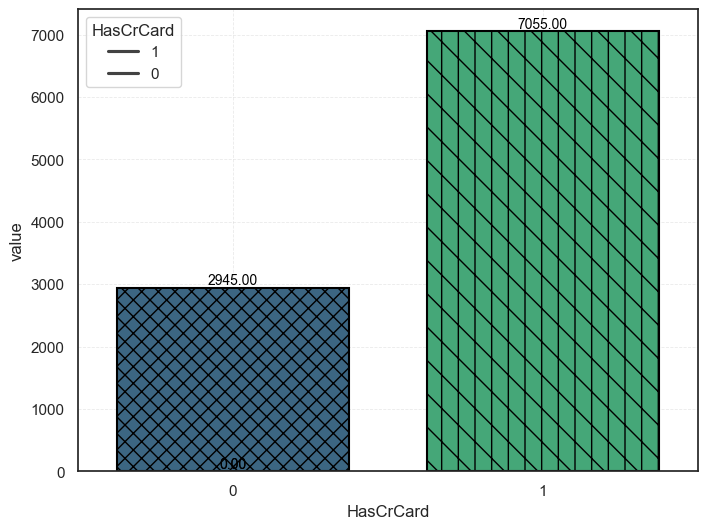

In [430]:
column_counts = original_df['HasCrCard'].value_counts().reset_index()
column_counts.columns = ['HasCrCard', 'value']

bar_plot_seaborn(df=column_counts, x='HasCrCard', y='value',palette='viridis')

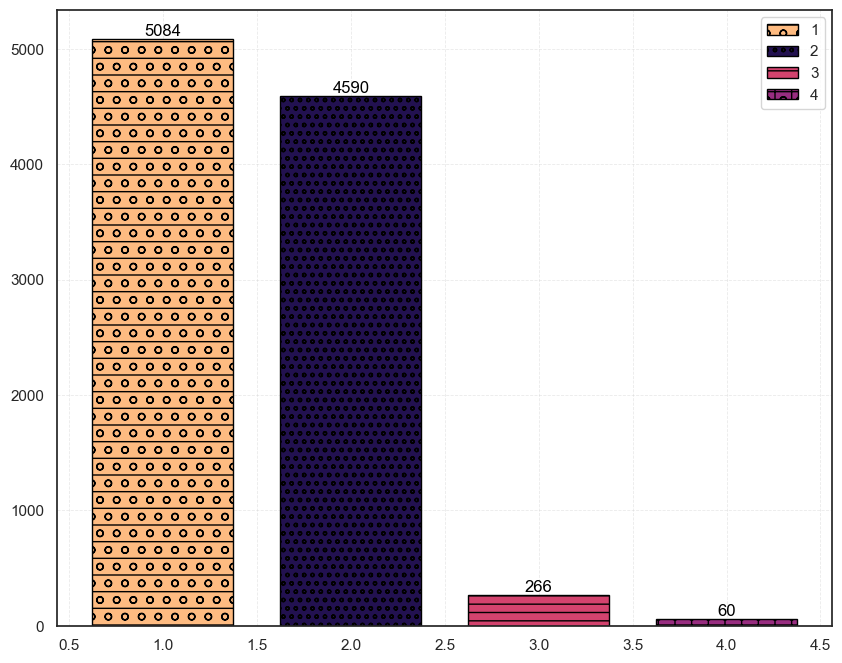

In [431]:
column_counts = original_df['NumOfProducts'].value_counts().reset_index()
column_counts.columns = ['NumOfProducts', 'value']

bar_plot_matplotlib(column_counts['NumOfProducts'], column_counts['value'],x_rotation=0)

## count plot

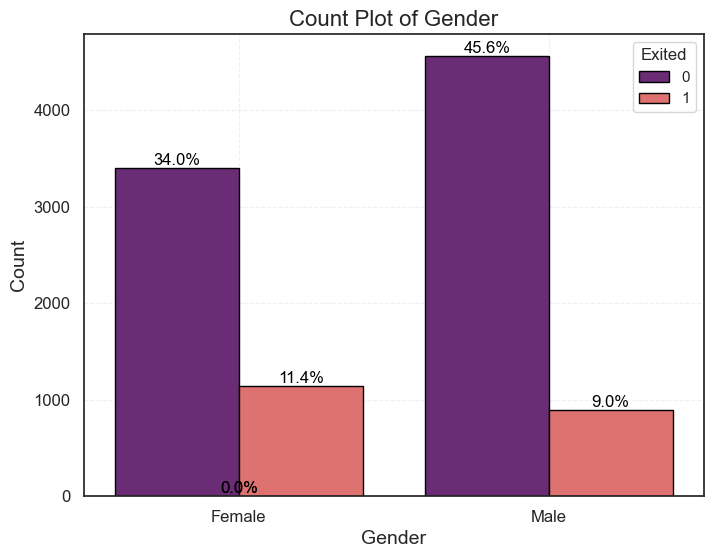

<Axes: title={'center': 'Count Plot of Gender'}, xlabel='Gender', ylabel='Count'>

In [432]:
count_plot(df=original_df , x='Gender' , hue='Exited')

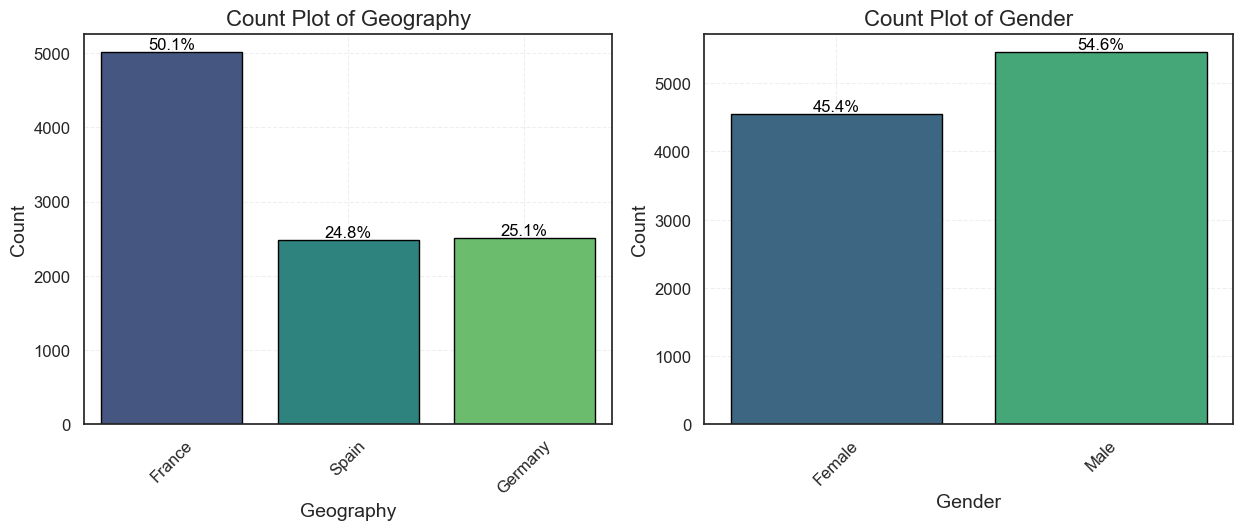

In [433]:
categorical_features=original_df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
count_plot_all_column(categorical_features, original_df, vision='x', num_of_column=4)

## Violin

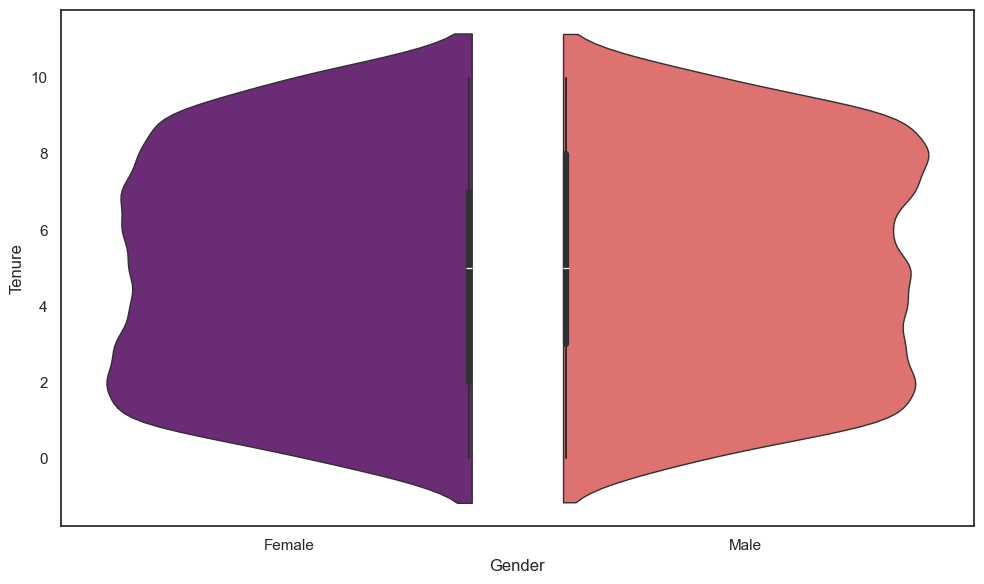

In [434]:
violin_plot(data=original_df, x='Gender', y='Tenure', hue='Gender',split=True) #catagorical column in x and numircal in y

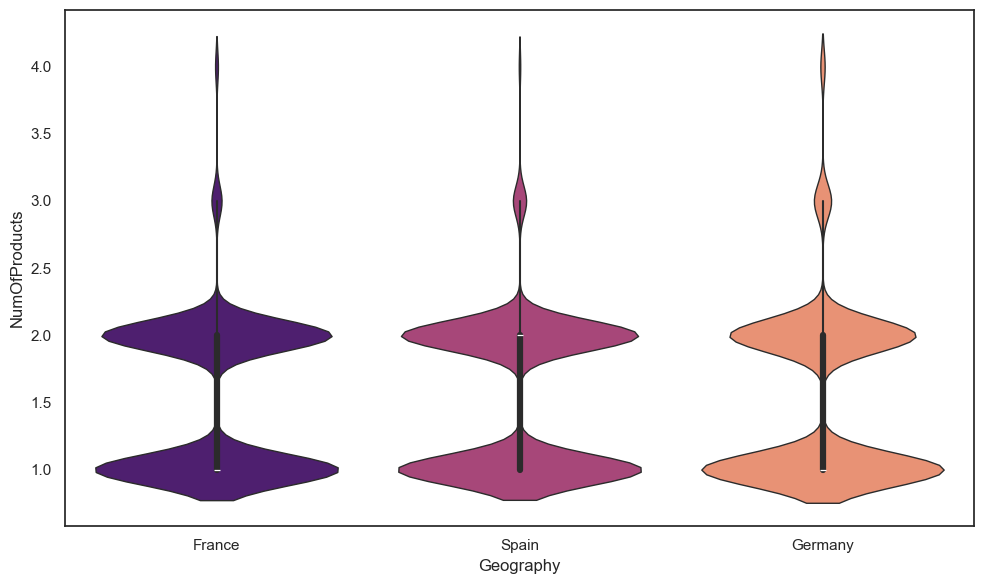

In [435]:
violin_plot(data=original_df, x='Geography', y='NumOfProducts', hue='Geography') #catagorical column in x and numircal in y

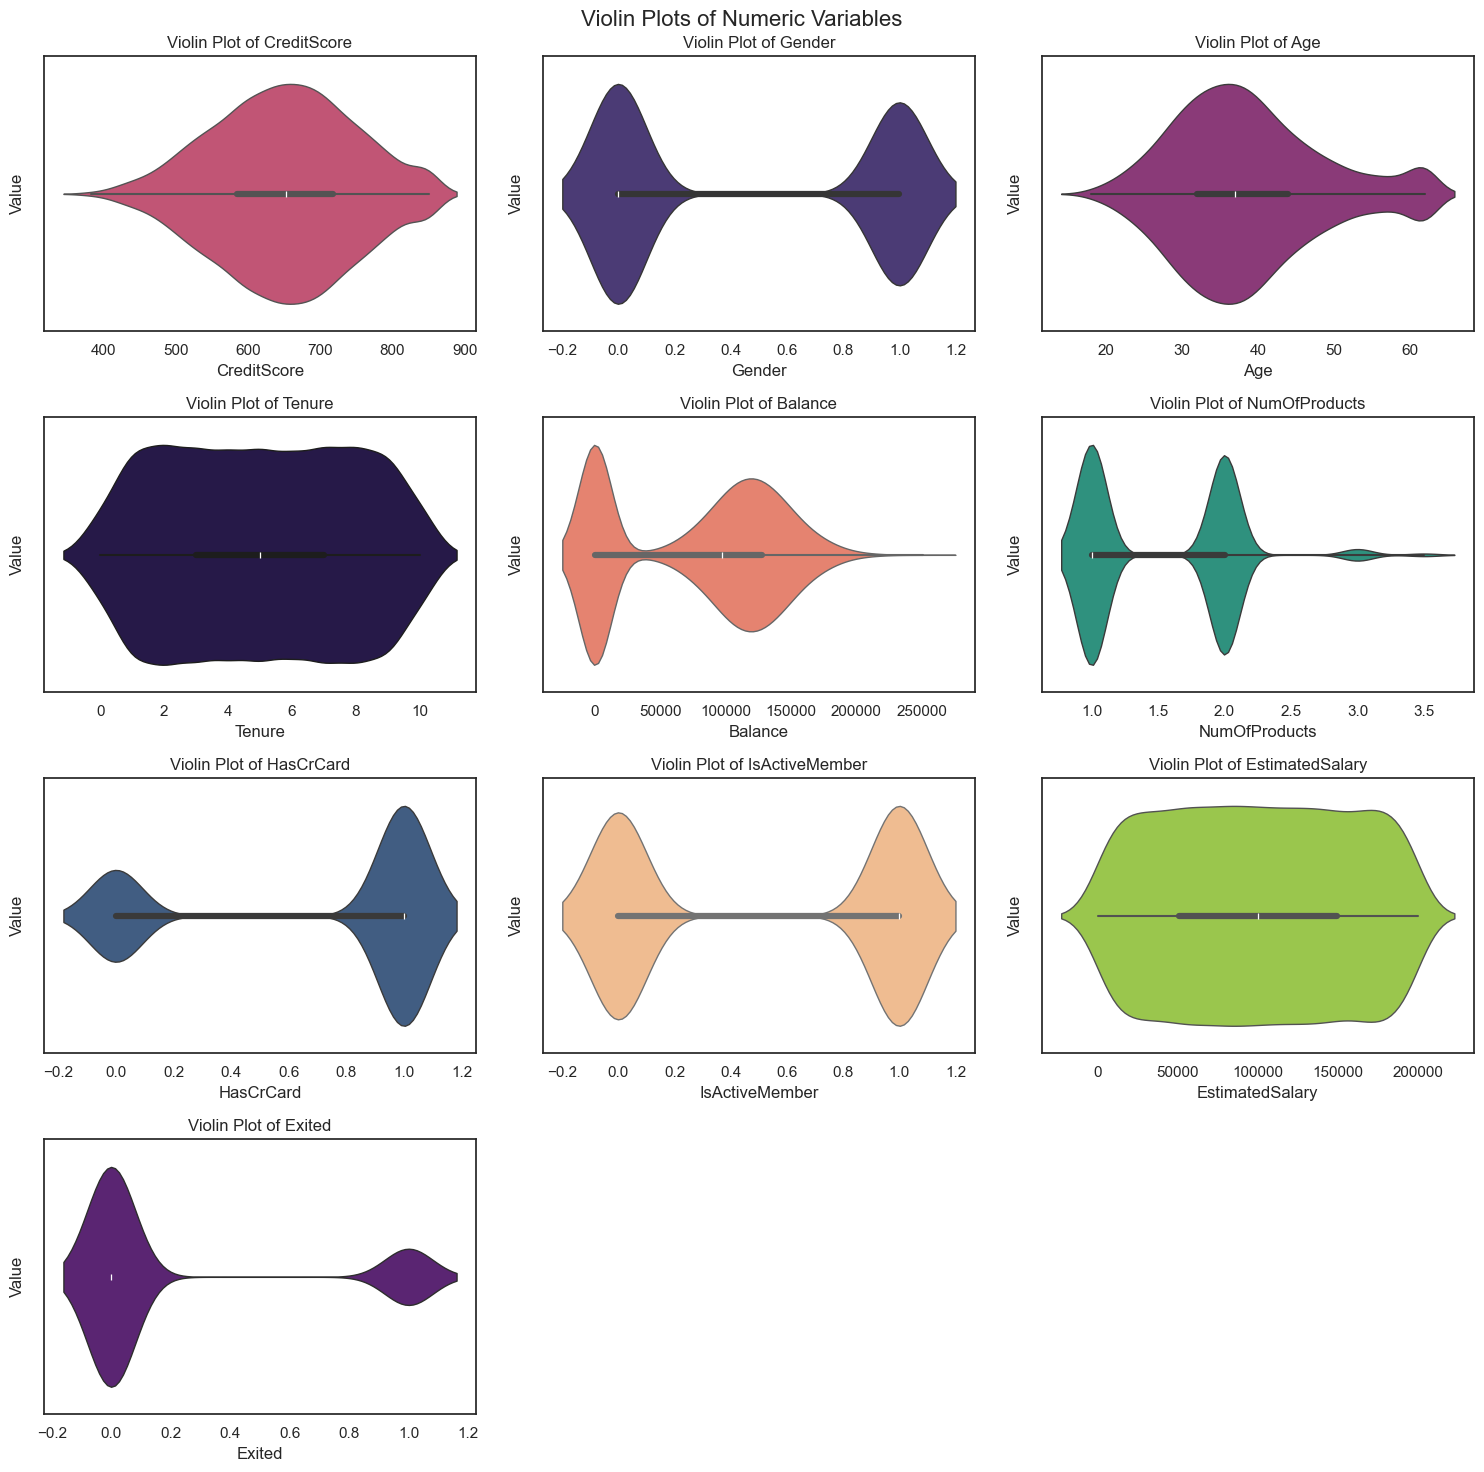

In [436]:
plot_violin_all_column(df)

## Histogram

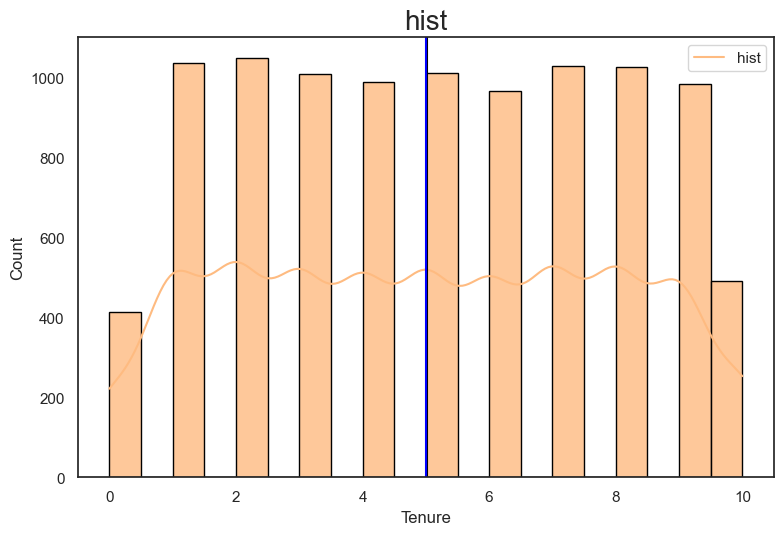

In [437]:
plot_single_histogram_seaborn(original_df,x='Tenure', bins=20, palette='magma', show=False)
plt.axvline(np.mean(original_df["Tenure"]) , color = "black" , label ="The Mean of the tenure")
plt.axvline(np.median(original_df["Tenure"]) , color = "blue" , label ="The Median of the tenure")
plt.show()

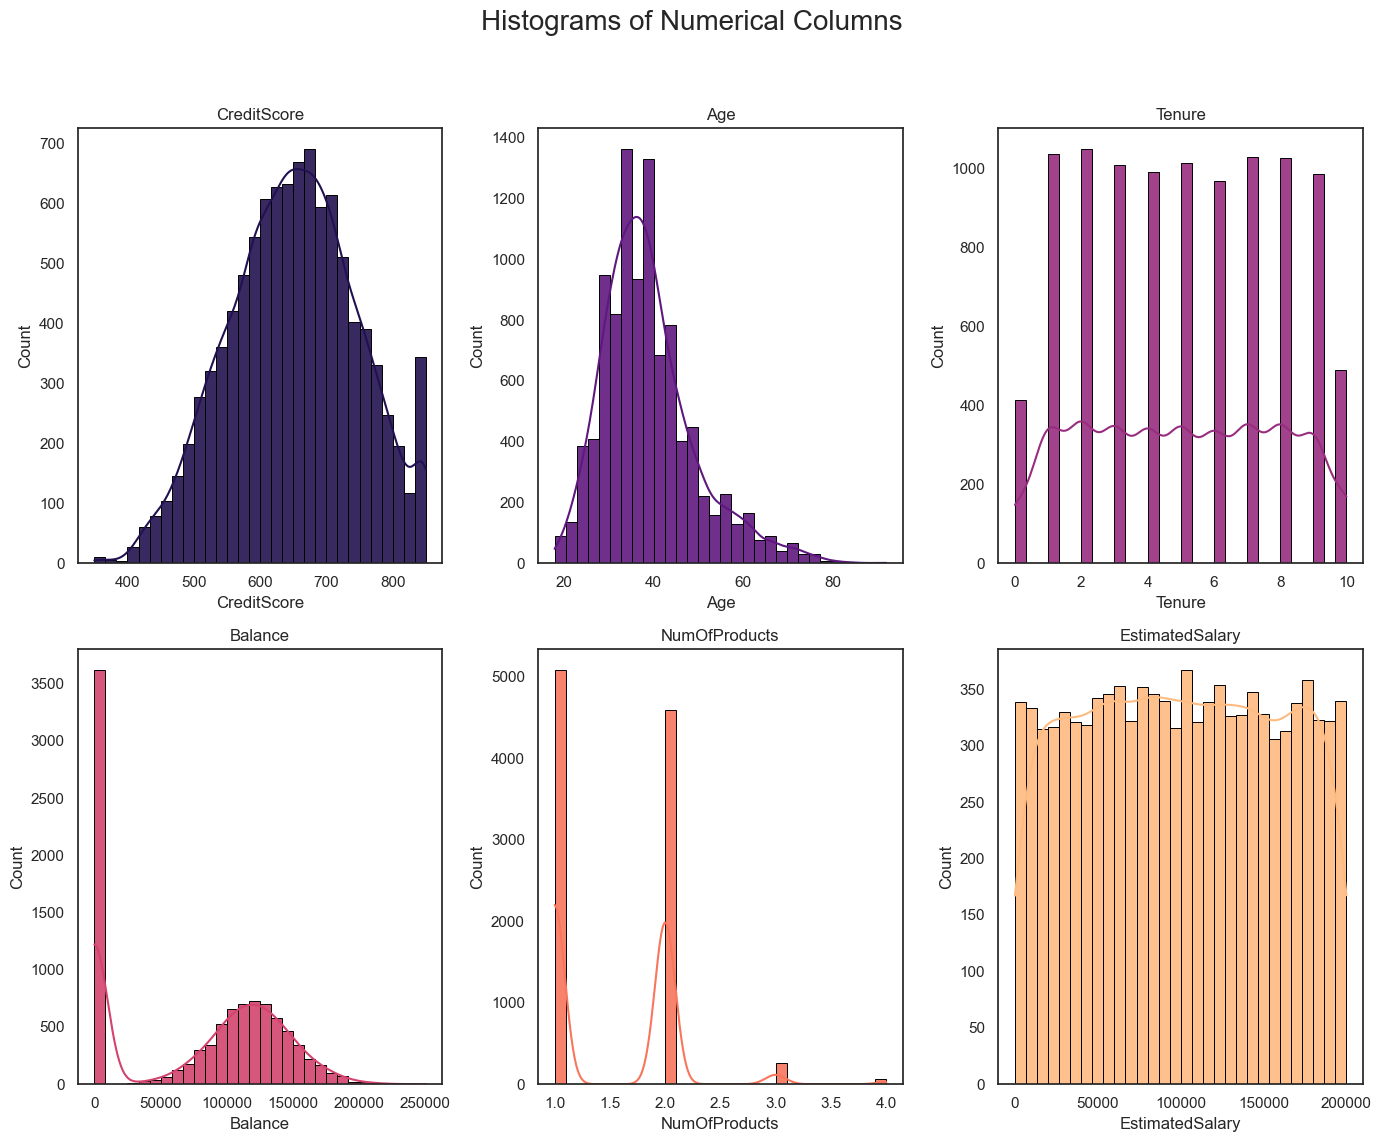

In [438]:
plot_histograms(original_df,column=None, bins=30)

# Correlation Coefficient

## Calculate Correlation

In [439]:
calculate_correlation(df, outcome_column=target_column,num_results=7)

Calculating Pearson correlation coefficients for numeric columns against the outcome column: {outcome_column}
Top 7 results:
         Variable  Pearson Coefficient        P-Value
2             Age             0.312436  2.561054e-225
7  IsActiveMember            -0.156128   1.348269e-55
4         Balance             0.118533   1.275563e-32
1          Gender             0.106512   1.258505e-26
5   NumOfProducts            -0.059196   3.141343e-09
0     CreditScore            -0.026455   8.154877e-03
3          Tenure            -0.014001   1.615268e-01

Age
The Pearson Correlation Coefficient for Age is 0.3124 with a P-value of P = 2.561e-225

IsActiveMember
The Pearson Correlation Coefficient for IsActiveMember is -0.1561 with a P-value of P = 1.348e-55

Balance
The Pearson Correlation Coefficient for Balance is 0.1185 with a P-value of P = 1.276e-32

Gender
The Pearson Correlation Coefficient for Gender is 0.1065 with a P-value of P = 1.259e-26

NumOfProducts
The Pearson Correlation Co

Variable  Pearson Coefficient        P-Value
2             Age             0.312436  2.561054e-225
7  IsActiveMember            -0.156128   1.348269e-55
4         Balance             0.118533   1.275563e-32
1          Gender             0.106512   1.258505e-26
5   NumOfProducts            -0.059196   3.141343e-09
0     CreditScore            -0.026455   8.154877e-03
3          Tenure            -0.014001   1.615268e-01

## Visualize Correlation with Bars

In [440]:
# df_corr = df.corr()[target_column].sort_values(ascending = False)
# df_corr_index = df_corr.index.to_list()
# df_corr_values = df_corr.values.tolist()
# df_corr = pd.DataFrame({'name': df_corr_index, 'values':df_corr_values})
# bar_plot_plotly(df=df_corr, x='name', y='values',hue='values', width=1500, height=650)

## Visualize Correlation with Heatmap

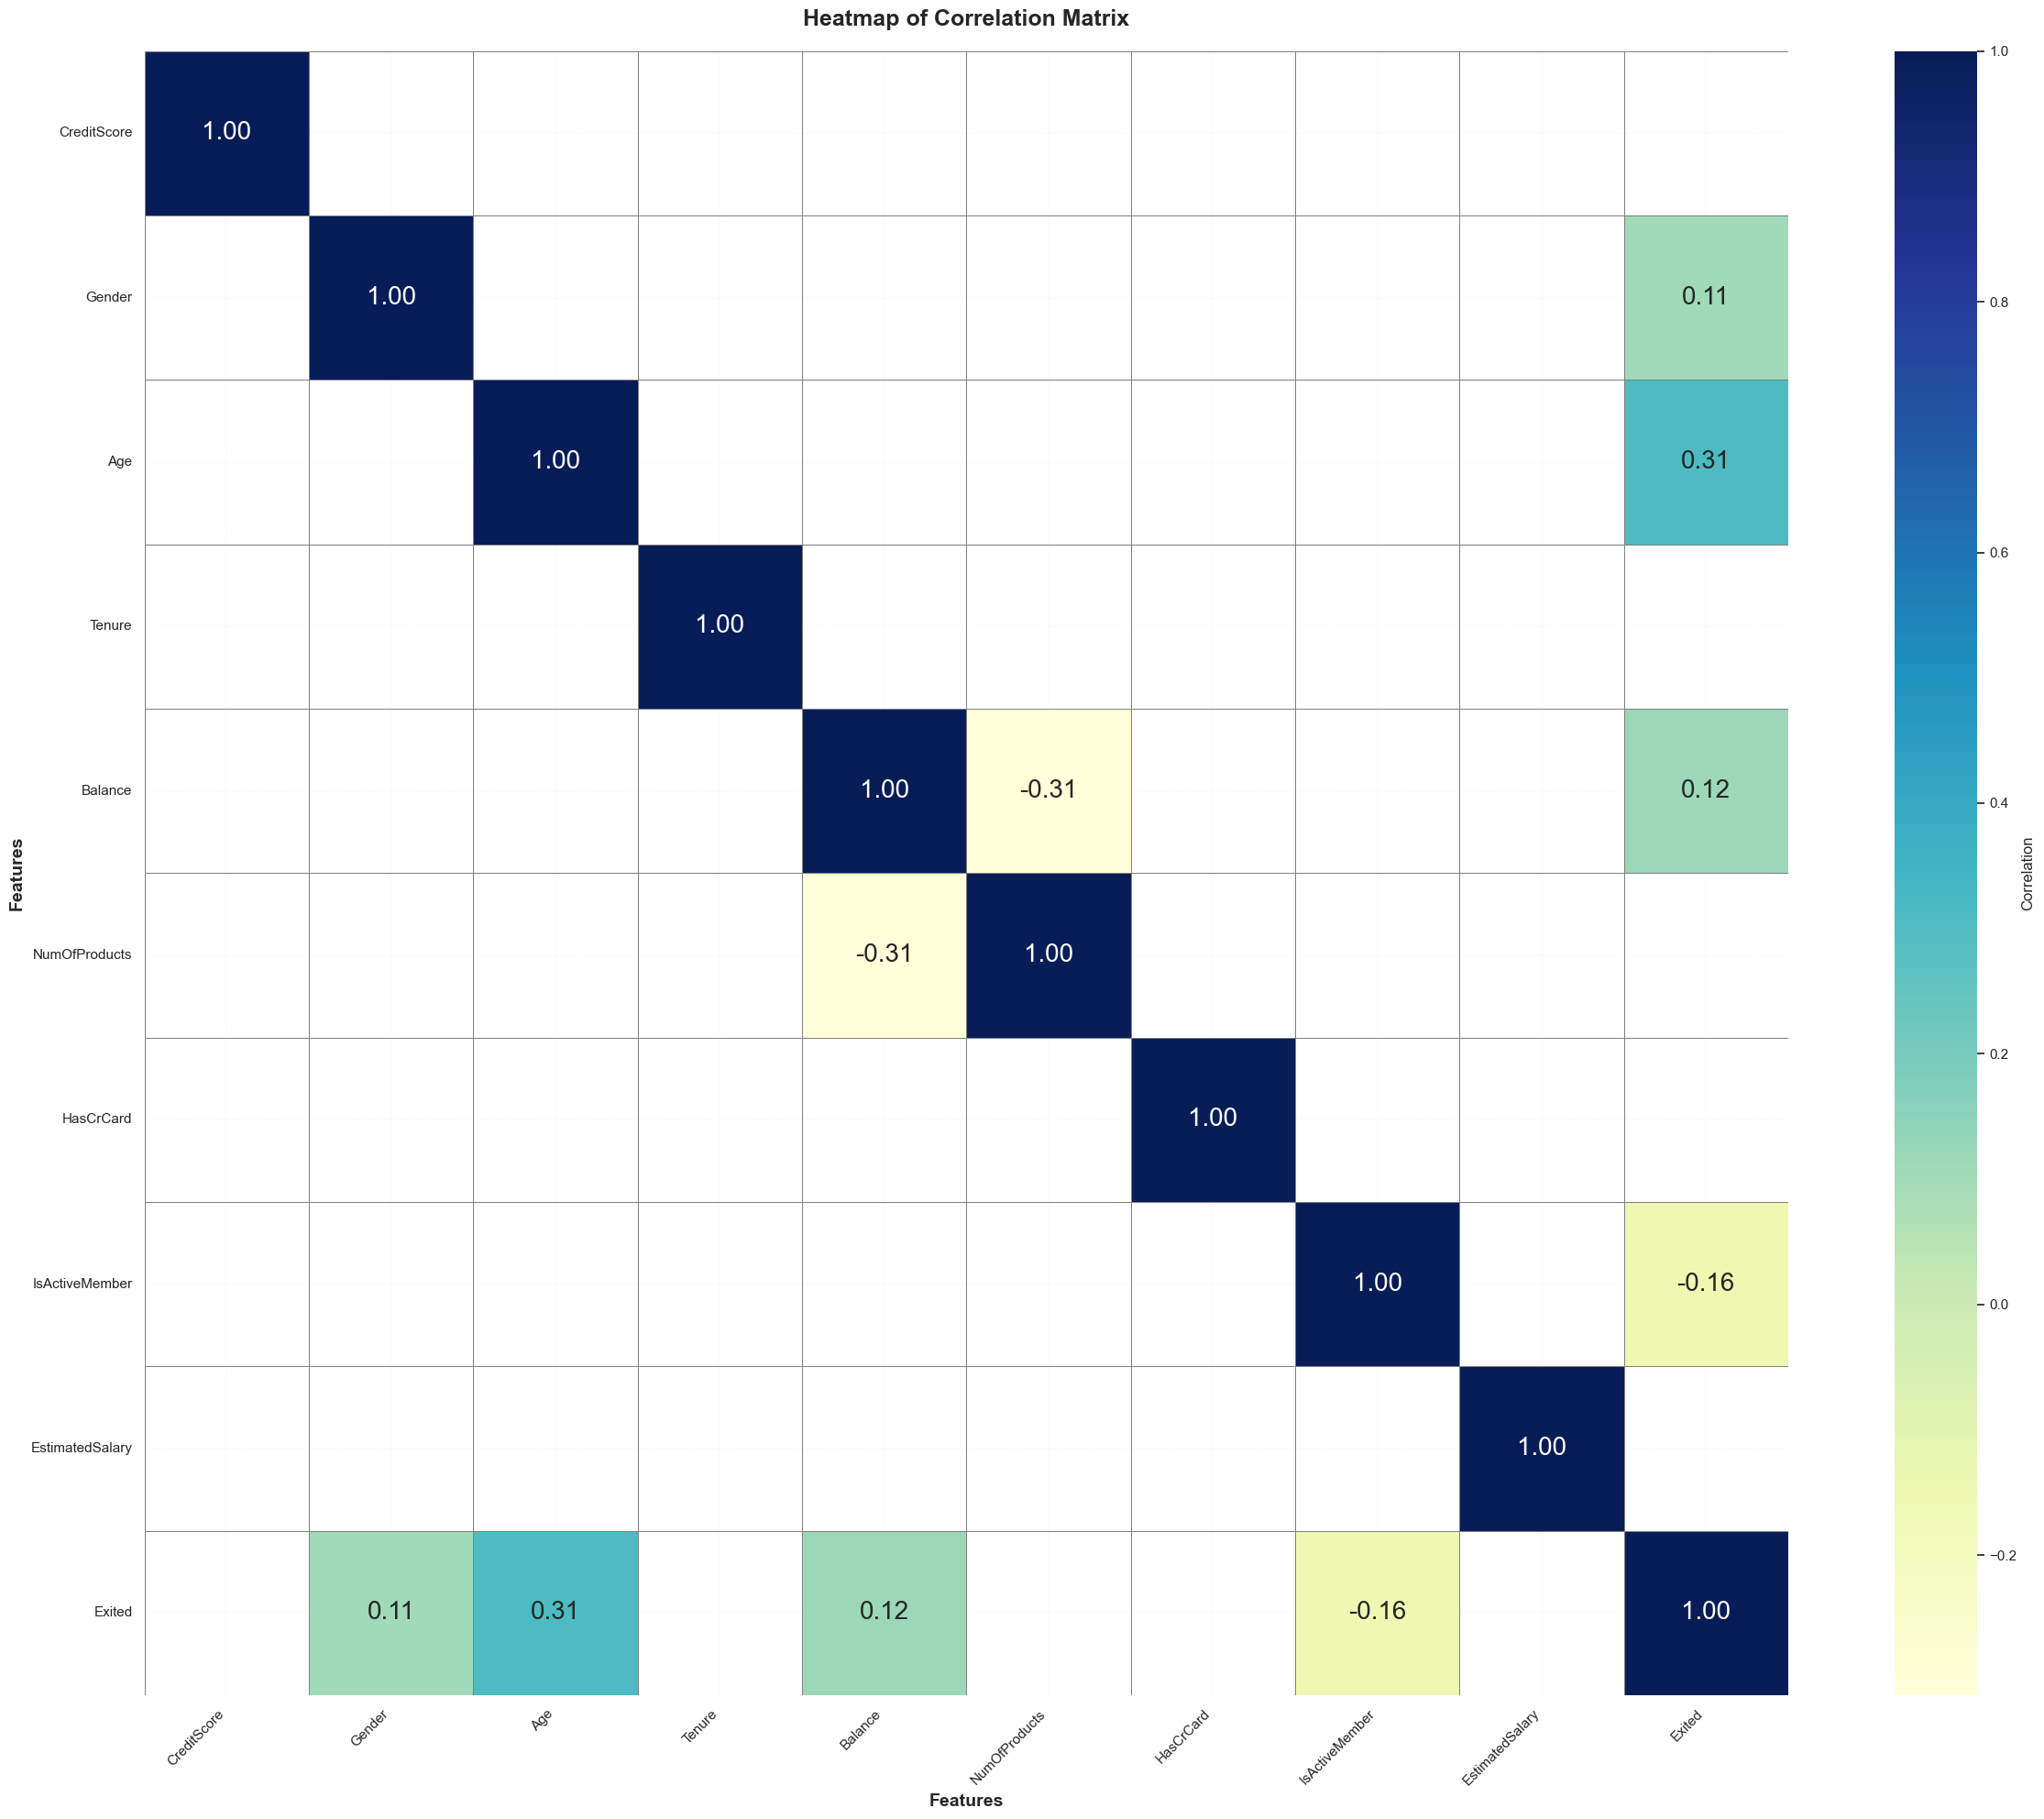

In [441]:
correlations = Heatmap_Correlation(df, mask=0.1, cmap="YlGnBu", adv_cmap=False, save_path=None, annot_size = 20, figsize=(25, 20))

# split data to x and y

In [442]:
x, y = get_x_y(df, target_column)

# Feature Selection

## Data Types and Corresponding Methods

### 1. Numerical Input and Numerical Output
#### Task: Regression
#### Methods: 
- SelectKBest, 
- SelectFdr, 
- SelectFwe, 
- SelectPercentile, 
- VarianceThreshold, 
- RFE, 
- RFECV, 
- SequentialFeatureSelector, 
- ExhaustiveFeatureSelector, 
- SelectFromModel, 
- TPOTRegressor, 
- Boruta, 
- InformationGain, 
- Lasso, 
- Ridge
#### Stat Methods: 
- f_regression, 
- mutual_info_regression, 
- pearsonr, 
- spearmanr, 
- kendalltau

### 2. Categorical Input and Numerical Output
#### Task: Regression
#### Methods:
- SelectKBest,
- SelectFdr,
- SelectFwe, 
- SelectPercentile,
- VarianceThreshold,
- RFE,
- RFECV,
- SequentialFeatureSelector,
- ExhaustiveFeatureSelector,
- SelectFromModel,
- TPOTRegressor,
- Boruta,
- InformationGain
#### Stat Methods:
- f_regression,
- mutual_info_regression

### 3. Numerical Input and Categorical Output
#### Task: Classification
#### Methods: 
- SelectKBest,
- SelectFdr,
- SelectFwe,
- SelectPercentile,
- VarianceThreshold,
- RFE,
- RFECV,
- SequentialFeatureSelector,
- ExhaustiveFeatureSelector,
- SelectFromModel,
- TPOTClassifier,
- Boruta,
- InformationGain
#### Stat Methods:
- chi2,
- f_classif,
- mutual_info_classif

### 4. Categorical Input and Categorical Output
#### Task: Classification
#### Methods:
- SelectKBest,
- SelectFdr,
- SelectFwe,
- SelectPercentile,
- VarianceThreshold,
- RFE,
- RFECV,
- SequentialFeatureSelector,
- ExhaustiveFeatureSelector,
- SelectFromModel,
- TPOTClassifier,
- Boruta,
- InformationGain
#### Stat Methods:
- chi2,
- f_classif,
- mutual_info_classif

### 5. Mixed Numerical and Categorical Input with Numerical Output
#### Task: Regression
#### Methods:
- RFE,
- RFECV,
- SequentialFeatureSelector,
- ExhaustiveFeatureSelector,
- SelectFromModel,
- TPOTRegressor,
- Boruta,

### 6. Mixed Numerical and Categorical Input with Categorical Output
#### Task: Classification
#### Methods:
- RFE,
- RFECV,
- SequentialFeatureSelector,
- ExhaustiveFeatureSelector,
- SelectFromModel,
- TPOTRegressor,
- Boruta,
- InformationGain,


## feature_selection def

In [443]:
print(f'Number of columns before feature selection: {len(x.columns)}')
print(f'Number of column can decrease it by using feature selection: between {len(x.columns) * 1/2} and {len(x.columns) * 2/3}')

print(f'\ncolumns before feature selection: {x.columns}')

x_before = x.columns

num_col = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f'\nNumerical columns before feature selection: {num_col}')

cat_col = x.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(f'\nCategorical columns before feature selection: {cat_col}')

Number of columns before feature selection: 10
Number of column can decrease it by using feature selection: between 5.0 and 6.666666666666667

columns before feature selection: Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

Numerical columns before feature selection: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

Categorical columns before feature selection: ['Geography']


In [444]:
x, FS_model, column_mapping = feature_selection(x, y, method='SelectKBest',n_features_to_select=8,k = 8, task= 'classification', n_jobs=-1)

In [ ]:
# selected_mask_FS = FS_model.get_support()

# # Get selected and dropped columns
# selected_columns = x.columns[selected_mask_FS]
# dropped_columns = x.columns[~selected_mask_FS]

In [448]:
print(f'Number of columns after feature selection: {len(x.columns)}')

print(f'\ncolumns before feature selection: {x_before}')

print(f'\ncolumns after feature selection: {x.columns}')

num_col = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f'\nNumerical columns after feature selection: {num_col}')

cat_col = x.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(f'\nCategorical columns after feature selection: {cat_col}')

df = pd.concat([x, y], axis=1)

Number of columns after feature selection: 8

columns before feature selection: Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

columns after feature selection: Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'HasCrCard', 'EstimatedSalary'],
      dtype='object')

Numerical columns after feature selection: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard', 'EstimatedSalary']

Categorical columns after feature selection: ['Geography']


# Data Encoding

In [449]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['Geography']

In [450]:
# ordinal_categories = df[''].value_counts().index.to_list()
# ordinal_categories

In [451]:
column = ['Geography']

df = encode_column(df, columns = 'Geography', method='get_dummies')

# df = encode_column(df, columns = '', method= 'label')

# df = encode_column(df, columns = '', method='target',target="")

# ordinal_categories = df['Subscription Type'].value_counts().index.to_list()
# df = encode_column(df, columns = 'Subscription Type', method= 'ordinal', ordinal_categories=['Basic', 'Standard', 'Premium'])

df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

[]

In [452]:
len(df.columns)

10

## Make the target is last column

In [453]:
df = target_last_col(df,target_column)
df.head()

CreditScore  Gender   Age  Tenure    Balance  HasCrCard  EstimatedSalary  \
0        619.0     1.0  42.0     2.0       0.00        1.0        101348.88   
1        608.0     1.0  41.0     1.0   83807.86        0.0        112542.58   
2        502.0     1.0  42.0     8.0  159660.80        1.0        113931.57   
3        699.0     1.0  39.0     1.0       0.00        0.0         93826.63   
4        850.0     1.0  43.0     2.0  125510.82        1.0         79084.10   

   Geography_Germany  Geography_Spain  Exited  
0                0.0              0.0       1  
1                0.0              1.0       0  
2                0.0              0.0       1  
3                0.0              0.0       0  
4                0.0              1.0       0

# Repair unbalanced data by using oversampling and undersampling.

In [454]:
x, y = get_x_y(df, target=target_column)

In [455]:
Counter(df[target_column])

Counter({0: 7963, 1: 2037})

In [456]:
df, x, y = over_under_sampling_classification(x, y, over_sampling_strategy=0.6, n_jobs=1)

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({0: 7963, 1: 2037})

use SVMSMOTE model for oversampling
Applying SVMSMOTE with strategy 0.6
after oversampling class distribution: Counter({0: 7963, 1: 4777})

use TomekLinks model for undersampling
Applying TomekLinks under-sampling.
after undersampling class distribution: Counter({0: 7062, 1: 4777})

Final class distribution: Counter({0: 7062, 1: 4777})
Over-sampling and/or under-sampling process completed.


### Check the unbalance data after repair 

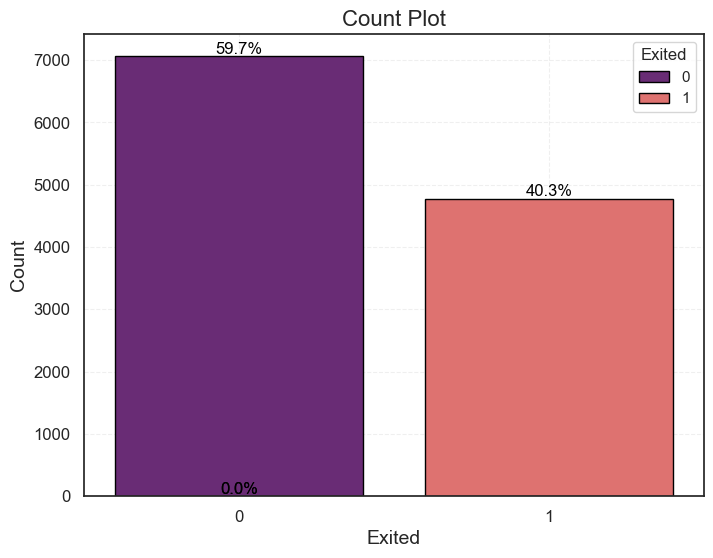

count
name       
0      7062
1      4777

In [457]:
check_balance_classification(df,column_plot=target_column)

# Get X , Y (TVT)

In [458]:
x,y = get_x_y(df,target_column)

In [459]:
x_train, y_train, x_valid, y_valid, x_test, y_test = get_x_y_TVT(df, target=target_column)

In [460]:
get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid, x_test, y_test)

x_train shape = (8334, 9)
x_valid shape = (1137, 9)
x_test shape = (2368, 9)
y_train shape = (8334,)
y_valid shape = (1137,)
y_test shape = (2368,)


# Get train, valid and test data in same time

In [461]:
# df.columns.tolist()
# x_train , y_train ,x_valid , y_valid , x_test , y_test = train_valid_test_split(df , target='Churn Value',train_size=0.7,valid_size=0.1,test_size=0.2,random_state=42)
# get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid , x_test, y_test)

# Scaling

In [462]:
x_train, x_valid, x_test = scale_data(x_train, x_valid, x_test)

# Dimensionality Reduction

In [463]:
# print(len(df.columns))
# print(x_train.shape[1])

In [464]:
# x_train, x_test, x_valid, DR_model = dimensionality_reduction(x_train=x_train, x_test=x_test, x_valid=x_valid, y_train=y_train, method= 'LDA', n_components=20)
# x = DR_model.transform(x)

# Train

In [517]:
models_names = ['XGBoost', 'RandomForest', 'SVM', 'Stacking']
models_values = [None, None, None, None]
have_overfitting = [None, None, None, None]

## XGBoost_model

In [466]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [467]:
best_params, best_score, best_estimator = grid_search_classifier('XGBoost', x_train, y_train, cv=type_cross_valid, scoring='accuracy')

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100}
best_params = 0.8440125420294091


In [468]:
XGBoost_model = best_estimator
XGBoost_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

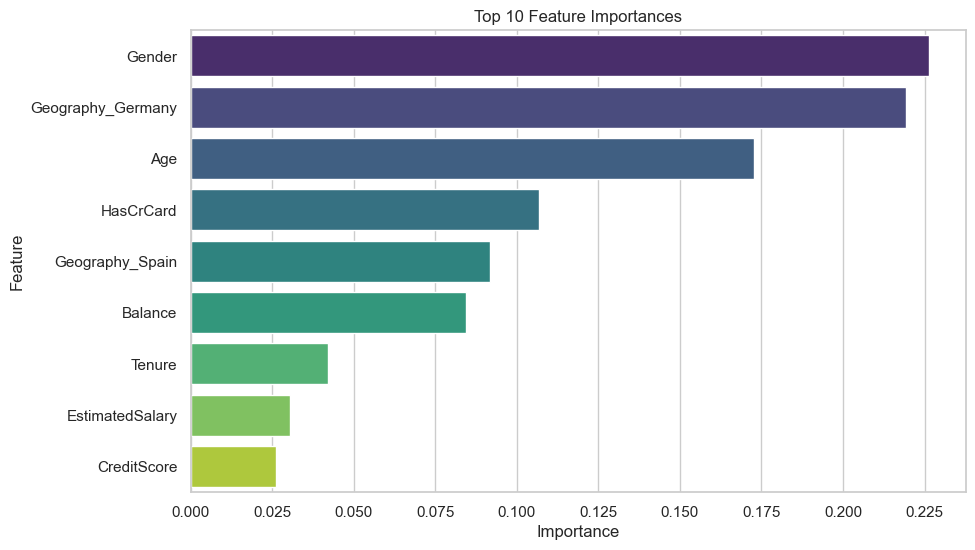

In [469]:
plot_feature_importance(XGBoost_model, x_train, x.columns, top_n='first')

### Check Overfitting

Accuracy:
Training Accuracy: 0.8856
Validation Accuracy: 0.8646

Precision:
Training Precision: 0.8901
Validation Precision: 0.8680

Recall:
Training Recall: 0.8856
Validation Recall: 0.8646

F1-Score:
Training F1-Score: 0.8836
Validation F1-Score: 0.8621

MCC:
Training MCC: 0.7644
Validation MCC: 0.7188

Balanced Accuracy:
Training Balanced Accuracy: 0.8686
Validation Balanced Accuracy: 0.8464

Confusion Matrix:
Validation Confusion Matrix:
[[637  39]
 [115 346]]

Cross-Validation(CV):
Cross-Validation Scores: [0.8433277  0.84248311 0.85008446 0.8441723  0.84537389]
Cross-Validation Mean Score: 0.8451


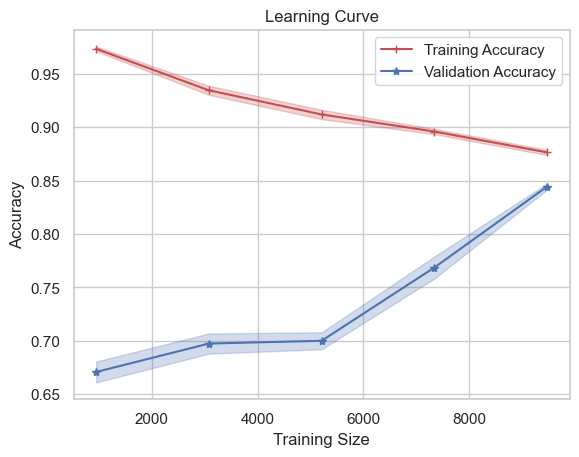

ROC AUC: 0.9103


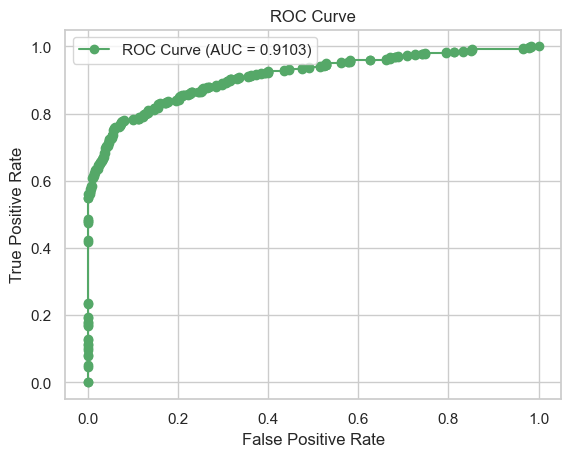

In [470]:
Check_Overfitting_Classification(XGBoost_model,x,y,x_train,y_train,x_valid,y_valid)

In [518]:
have_overfitting[0] = 0 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [519]:
y_pred = XGBoost_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

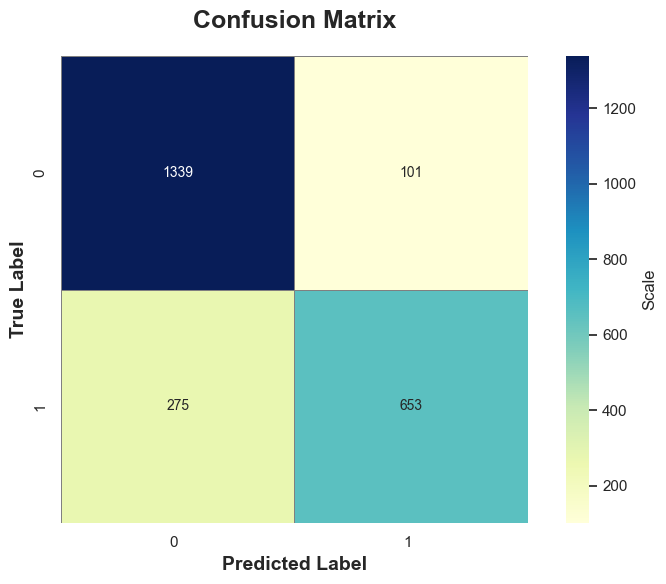

In [520]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.8412
Recall score = 0.7037
Precision score = 0.8660
F1 score = 0.7765
ROC AUC score = 0.8168

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1440
           1       0.87      0.70      0.78       928

    accuracy                           0.84      2368
   macro avg       0.85      0.82      0.83      2368
weighted avg       0.84      0.84      0.84      2368




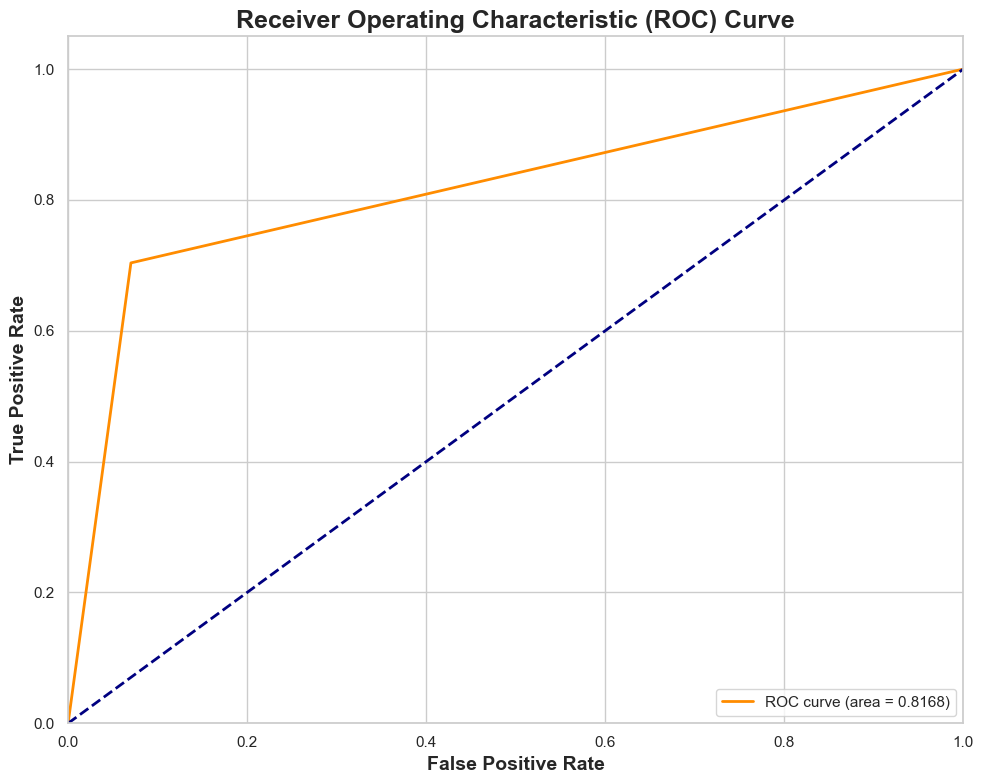

In [521]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values[0] = [accuracy, recall, precision, f1, roc_auc]

## RandomForest_model

In [475]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [477]:
best_params, best_score, best_estimator = grid_search_classifier('RandomForest', x_train, y_train, cv=type_cross_valid, scoring='precision')

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'max_depth': 10, 'n_estimators': 200}
best_params = 0.8656460255181514


In [478]:
RandomForest_model = best_estimator
RandomForest_model

RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1)

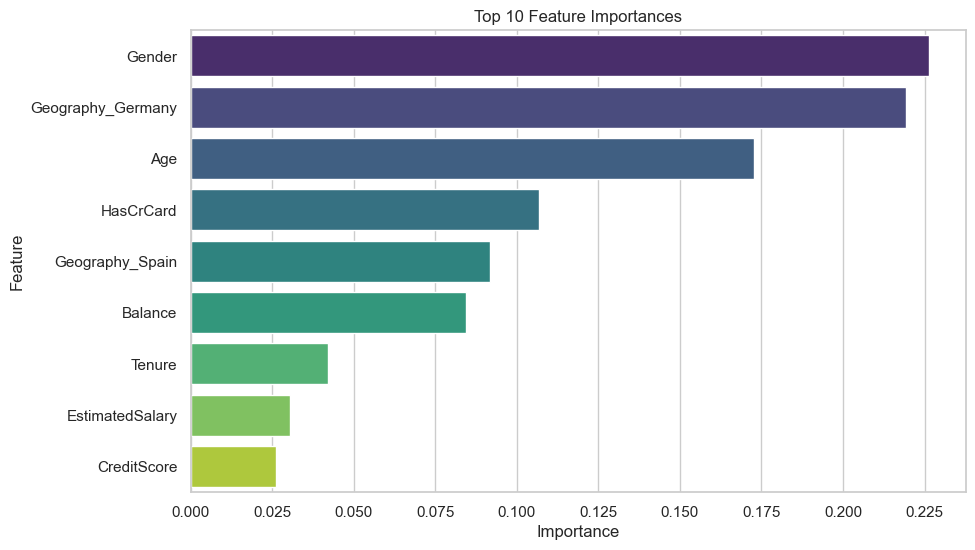

In [479]:
plot_feature_importance(XGBoost_model, x_train, x.columns, top_n='first')

### Check Overfitting

Accuracy:
Training Accuracy: 0.8673
Validation Accuracy: 0.8549

Precision:
Training Precision: 0.8716
Validation Precision: 0.8595

Recall:
Training Recall: 0.8673
Validation Recall: 0.8549

F1-Score:
Training F1-Score: 0.8647
Validation F1-Score: 0.8517

MCC:
Training MCC: 0.7255
Validation MCC: 0.6991

Balanced Accuracy:
Training Balanced Accuracy: 0.8488
Validation Balanced Accuracy: 0.8345

Confusion Matrix:
Validation Confusion Matrix:
[[637  39]
 [126 335]]

Cross-Validation(CV):
Cross-Validation Scores: [0.83065878 0.83530405 0.84459459 0.83783784 0.83565695]
Cross-Validation Mean Score: 0.8368


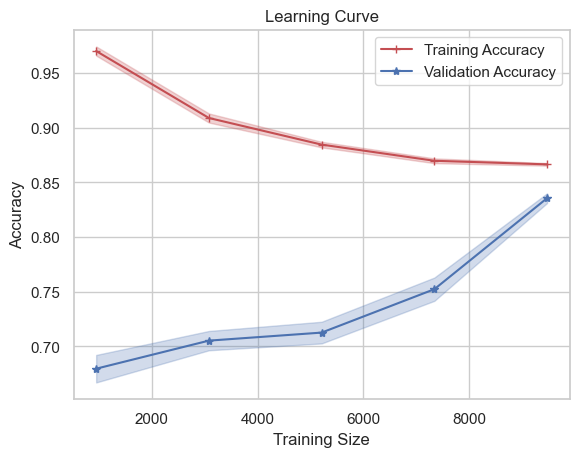

ROC AUC: 0.9075


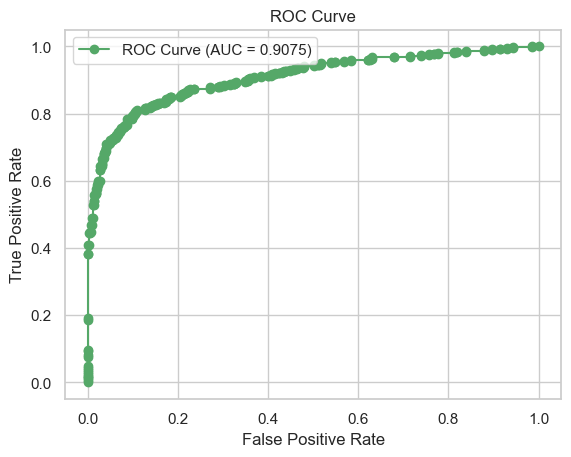

In [480]:
Check_Overfitting_Classification(RandomForest_model,x,y,x_train,y_train,x_valid,y_valid)

In [522]:
have_overfitting[1] = 0 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [523]:
y_pred = RandomForest_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

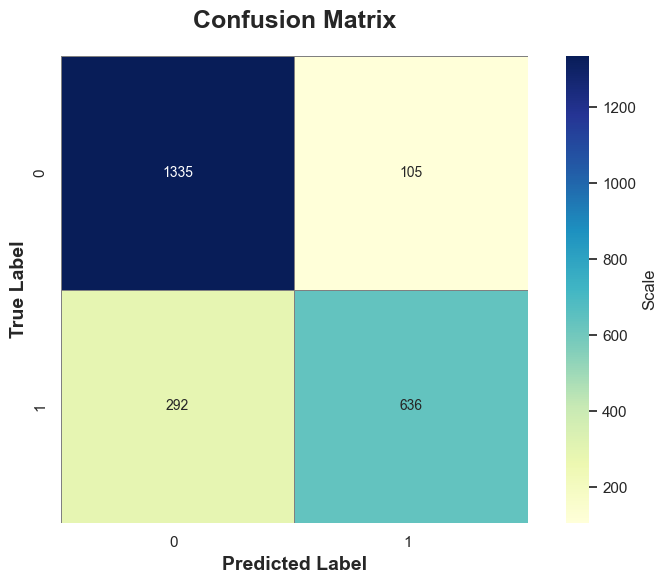

In [524]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.8323
Recall score = 0.6853
Precision score = 0.8583
F1 score = 0.7621
ROC AUC score = 0.8062

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1440
           1       0.86      0.69      0.76       928

    accuracy                           0.83      2368
   macro avg       0.84      0.81      0.82      2368
weighted avg       0.84      0.83      0.83      2368




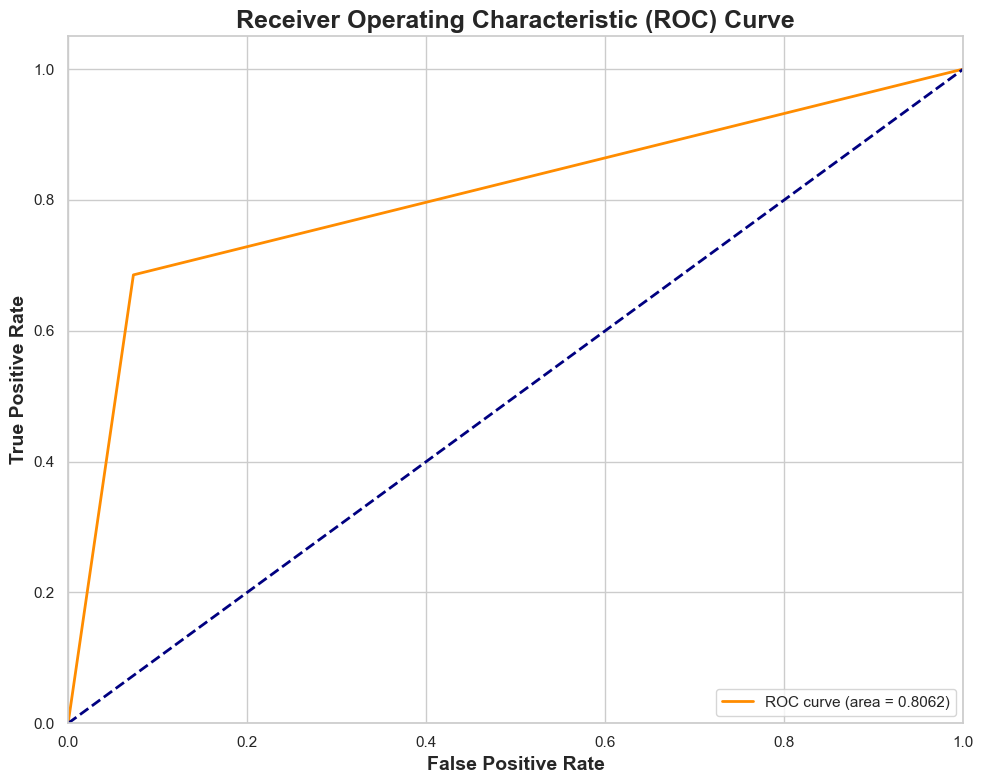

In [525]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values[1] = [accuracy, recall, precision, f1, roc_auc]

## SVM_model

In [485]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [486]:
best_params, best_score, best_estimator = grid_search_classifier('SVM', x_train, y_train, cv=type_cross_valid, scoring='precision')

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'C': 10, 'kernel': 'rbf'}
best_params = 0.7989772326661931


In [487]:
SVM_model = best_estimator
SVM_model

SVC(C=10)

### Check Overfitting

Accuracy:
Training Accuracy: 0.8392
Validation Accuracy: 0.8223

Precision:
Training Precision: 0.8406
Validation Precision: 0.8234

Recall:
Training Recall: 0.8392
Validation Recall: 0.8223

F1-Score:
Training F1-Score: 0.8367
Validation F1-Score: 0.8193

MCC:
Training MCC: 0.6642
Validation MCC: 0.6278

Balanced Accuracy:
Training Balanced Accuracy: 0.8218
Validation Balanced Accuracy: 0.8033

Confusion Matrix:
Validation Confusion Matrix:
[[611  65]
 [137 324]]

Cross-Validation(CV):
Cross-Validation Scores: [0.63344595 0.63851351 0.6089527  0.64273649 0.6434305 ]
Cross-Validation Mean Score: 0.6334


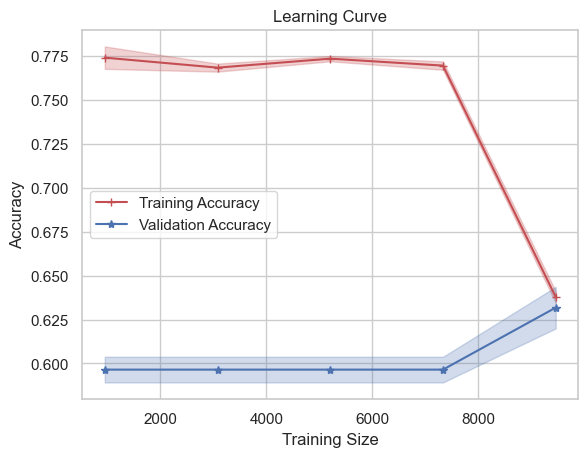

ROC AUC: Not available for this model


In [488]:
Check_Overfitting_Classification(SVM_model,x,y,x_train,y_train,x_valid,y_valid)

In [526]:
have_overfitting[2] = 0 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [527]:
y_pred = SVM_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

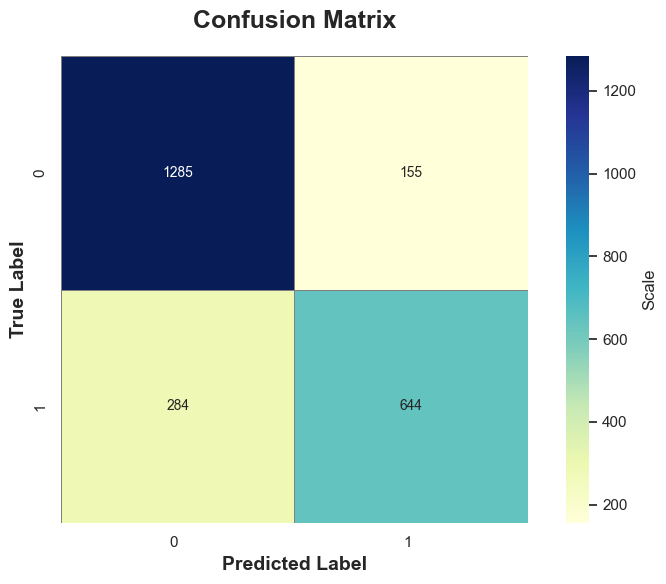

In [528]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.8146
Recall score = 0.6940
Precision score = 0.8060
F1 score = 0.7458
ROC AUC score = 0.7932

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1440
           1       0.81      0.69      0.75       928

    accuracy                           0.81      2368
   macro avg       0.81      0.79      0.80      2368
weighted avg       0.81      0.81      0.81      2368




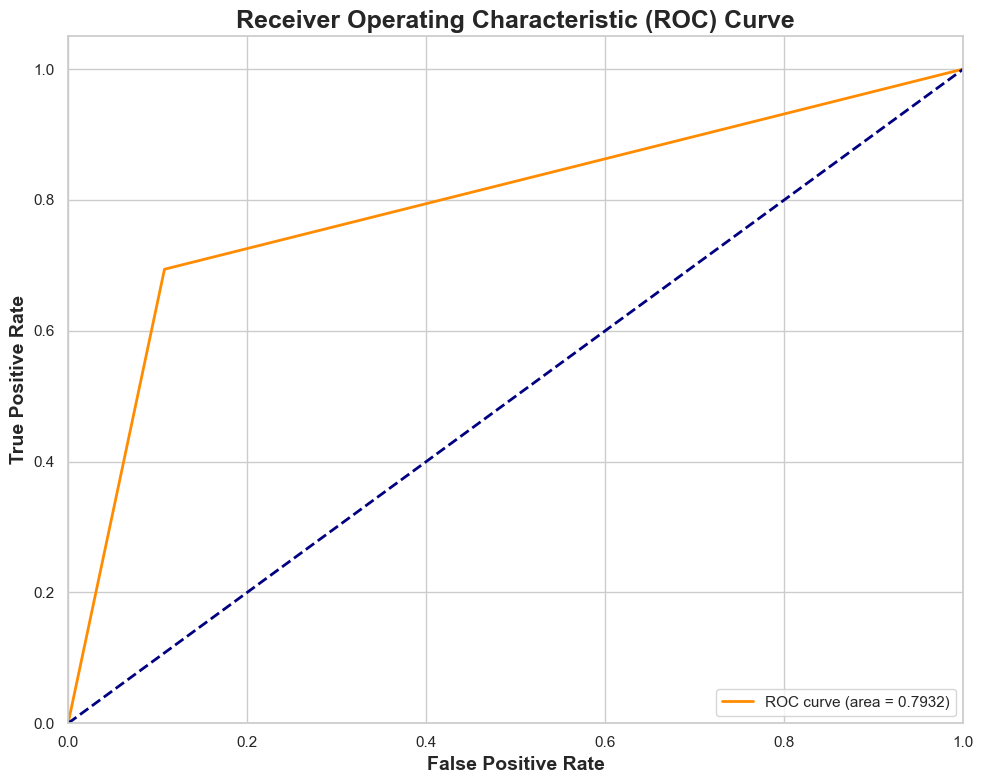

In [529]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values[2] = [accuracy, recall, precision, f1, roc_auc]

## Stacking_model

In [493]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [494]:
xgboost = XGBClassifier(gamma= 0.1, learning_rate= 0.2, max_depth= 5, min_child_weight= 3, n_estimators= 100)
random_forest = RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1)
svc = SVC(C=1, kernel='rbf')

final_estimator= LogisticRegression()

voting_classifier =[('xgb', xgboost),('rf', random_forest),('svc', svc)]

Stacking_model = StackingClassifier(estimators=voting_classifier, cv=type_cross_valid, final_estimator=LogisticRegression())
Stacking_model.fit(x_train, y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0.1,
                                              grow_policy=None,...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=3, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('rf',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=200,
                                                       n_jobs=-1)),
                               ('svc', SVC(C=1))],
                   final_estimator=LogisticRegression())

### Check Overfitting

Accuracy:
Training Accuracy: 0.8890
Validation Accuracy: 0.8619

Precision:
Training Precision: 0.8913
Validation Precision: 0.8646

Recall:
Training Recall: 0.8890
Validation Recall: 0.8619

F1-Score:
Training F1-Score: 0.8875
Validation F1-Score: 0.8596

MCC:
Training MCC: 0.7700
Validation MCC: 0.7127

Balanced Accuracy:
Training Balanced Accuracy: 0.8748
Validation Balanced Accuracy: 0.8446

Confusion Matrix:
Validation Confusion Matrix:
[[633  43]
 [114 347]]

Cross-Validation(CV):
Cross-Validation Scores: [0.8441723  0.84501689 0.85641892 0.84839527 0.84495142]
Cross-Validation Mean Score: 0.8478


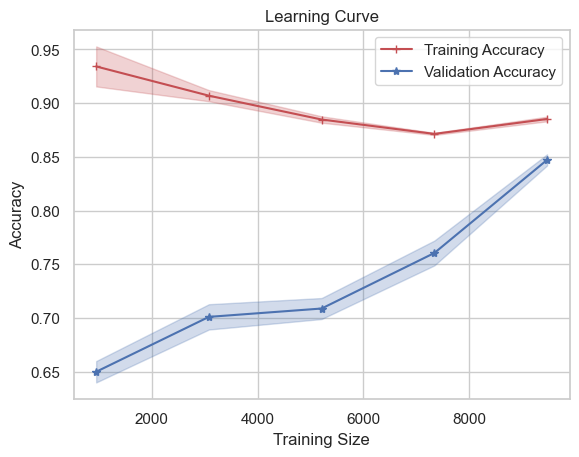

ROC AUC: 0.9127


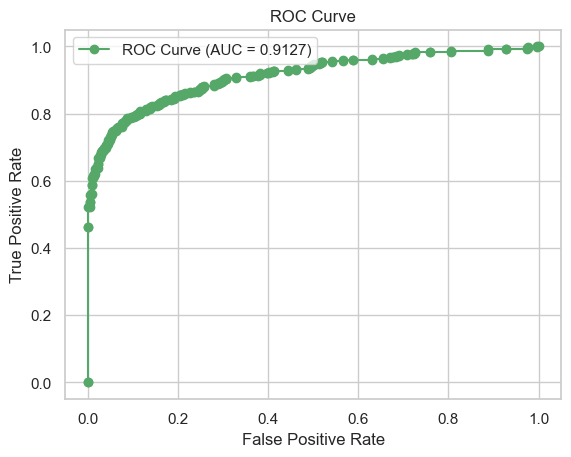

In [495]:
Check_Overfitting_Classification(Stacking_model,x,y,x_train,y_train,x_valid,y_valid)

In [530]:
have_overfitting[3] = 0 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [531]:
y_pred = Stacking_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

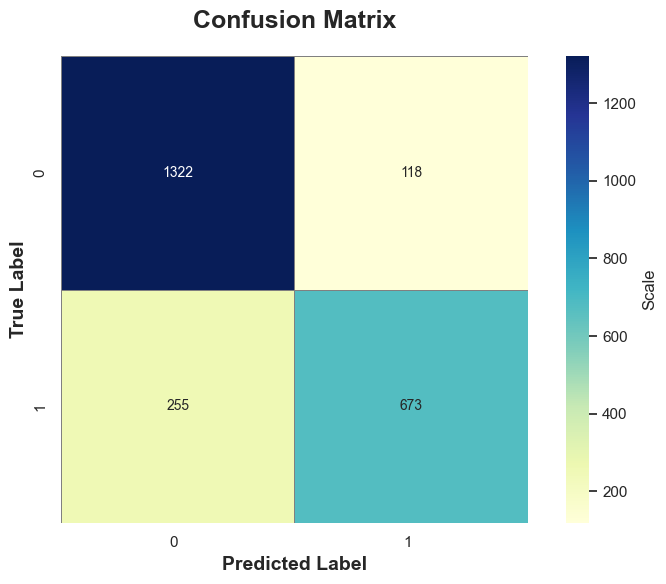

In [532]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.8425
Recall score = 0.7252
Precision score = 0.8508
F1 score = 0.7830
ROC AUC score = 0.8216

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1440
           1       0.85      0.73      0.78       928

    accuracy                           0.84      2368
   macro avg       0.84      0.82      0.83      2368
weighted avg       0.84      0.84      0.84      2368




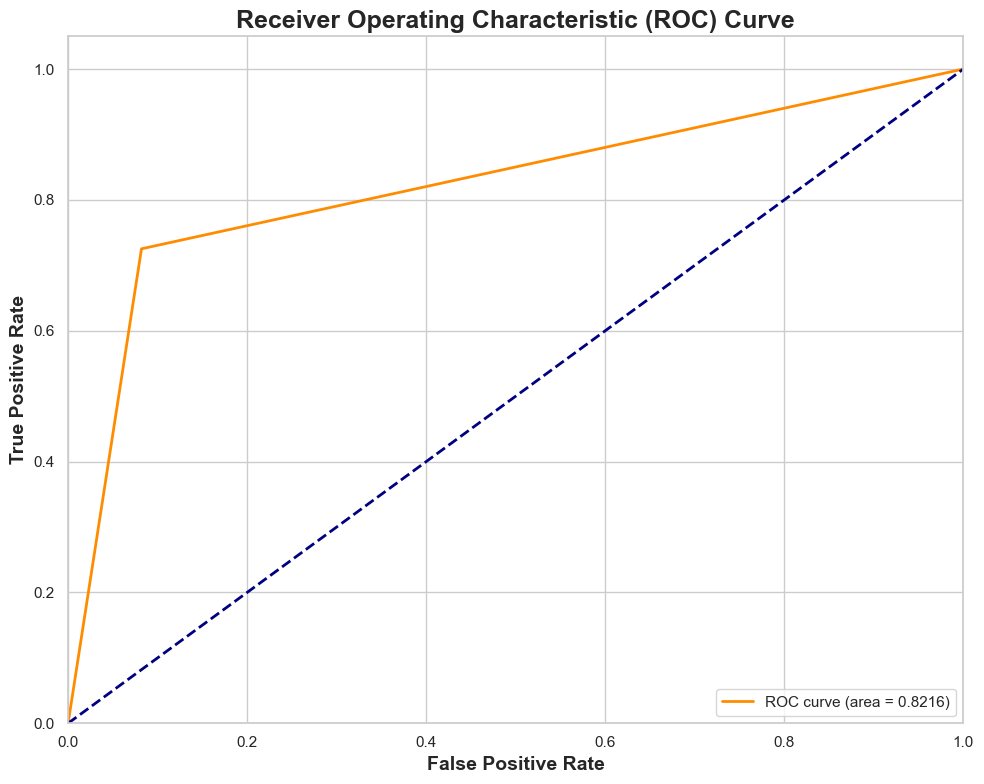

In [533]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values[3] = [accuracy, recall, precision, f1, roc_auc]

# compare between the models

In [534]:
evaluate_names = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']
models_names = ['XGBoost', 'RandomForest', 'DecisionTre', 'Stacking']

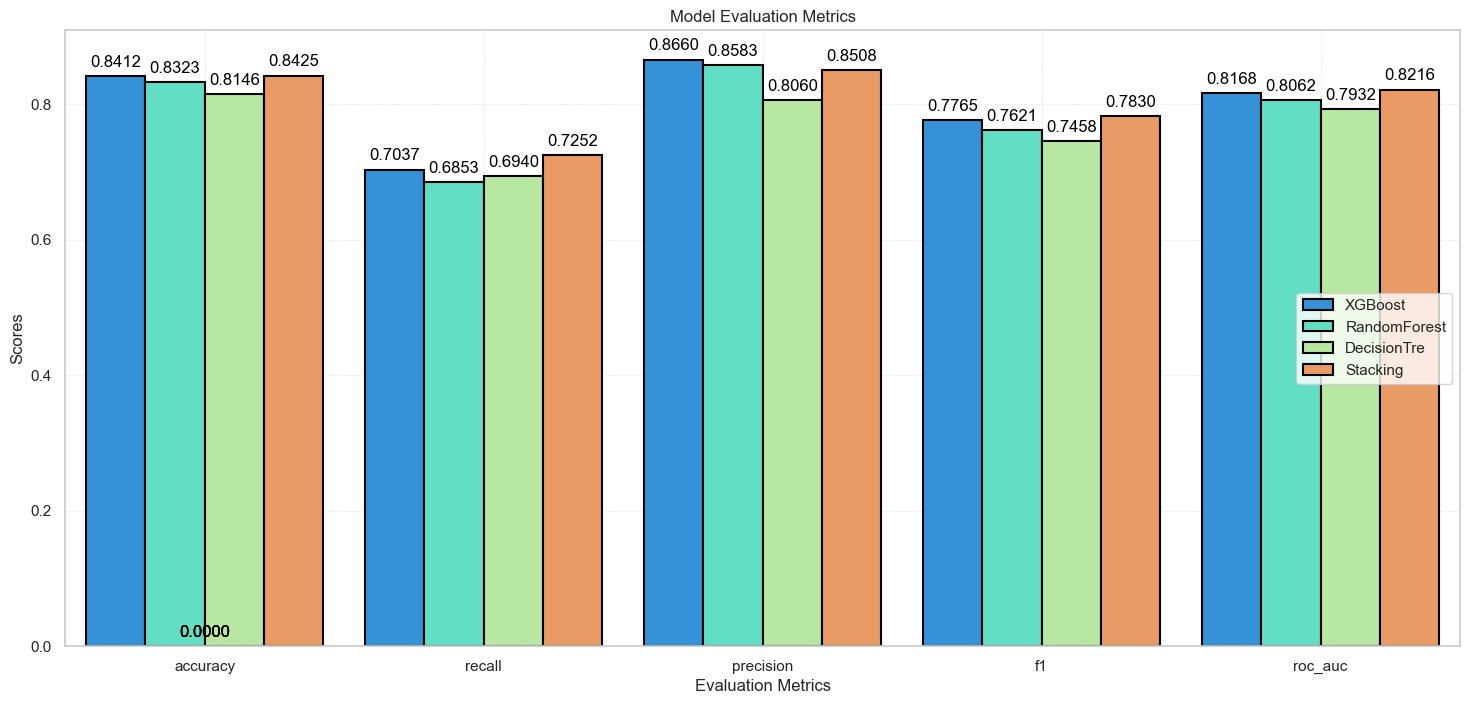

In [535]:
plots_evaluate_models(
    data=models_values, 
    labels=models_names, 
    categories=evaluate_names,
    have_overfitting=have_overfitting,
    palette='rainbow',
    title='Model Evaluation Metrics',
    xlabel='Evaluation Metrics',
    ylabel='Scores',
    figsize=(18, 8),
    width=0.85,
    hatch = False,
    annote_num = 4
)